# Introduction

**HR Analytics**

HR departments have a tradition of collecting vast amounts of HR data. Unfortunately, this data often remains unused. As soon as organizations start to analyze their people problems by using their data, they are engaged in HR analytics. Over the past years, Human Resource Management has changed a lot. It has moved from an operational discipline towards a more strategic discipline.

HR Analytics enables HR professionals to make data-driven decisions and it helps us with interpreting organizational data. It helps to find people-related trends in the data and helps the HR Department taking appropriate steps to keep the organization running smoothly and profitably.

Questions coming up for that dataset might be: 

* What is the overall diversity profile of the organization?
* What are our best recruiting sources if we want to ensure a diverse organization?
* Are there areas of the company where pay is not equitable?
* How high is your annual employee turnover?
* What characterizes our most successful managers?

And further more ... 

**Dataset**

The dataset is is a randomly created HR-related dataset from kaggle: https://www.kaggle.com/rhuebner/human-resources-data-set The CSV revolves around a fictitious company and the core data set contains names, DOBs, age, gender, marital status, date of hire, reasons for termination, department, whether they are active or terminated, position title, pay rate, manager name, abscences, most recent performance review date, employee engagement score and performance score.


At this point I would like to mention: In this dataset there are some features like race. In the United States it is common that various groups are categorized according to the United States Census Bureau. Even though I don't agree with this feature in this fictional dataset it's just an example to analyze the diversity of a company. And in my opinion it might be a better way to delete the race feature or change it to "ethnicity" as it more refers to cultural expression and identification. 

# Setup

In [1]:
# Common imports
import pandas as pd # import pandas for importing csv files  
import numpy as np # import numpy package for arrays and stuff 
import itertools
from time import time
import missingno as msno
import glob
from dateutil.relativedelta import relativedelta


#Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix
pd.set_option('display.max_columns', 50)
plt.style.use(['ggplot'])
sns.set()
%matplotlib inline

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
#import datatframe
df = pd.read_csv('/Users/raphaelaboll/nf-sep-20/Projects/HR_Dataset/HRDataset_v14.csv')

# Data Mining 

## Getting a feeling for my data

In [3]:
#take a frist look at the data
df.head(2).T

,0,1
Employee_Name,"Adinolfi, Wilson K","Ait Sidi, Karthikeyan"
EmpID,10026,10084
MarriedID,0,1
MaritalStatusID,0,1
GenderID,1,1
EmpStatusID,1,5
DeptID,5,3
PerfScoreID,4,3
FromDiversityJobFairID,0,0
Salary,62506,104437


In [4]:
print('Dimension of the dataset:', df.shape)

Dimension of the dataset: (311, 36)


In [5]:
#check statistical values
df.describe().round().transpose()

,count,mean,std,min,25%,50%,75%,max
EmpID,311.0,10156.0,90.0,10001.0,10078.0,10156.0,10234.0,10311.0
MarriedID,311.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
MaritalStatusID,311.0,1.0,1.0,0.0,0.0,1.0,1.0,4.0
GenderID,311.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
EmpStatusID,311.0,2.0,2.0,1.0,1.0,1.0,5.0,5.0
DeptID,311.0,5.0,1.0,1.0,5.0,5.0,5.0,6.0
PerfScoreID,311.0,3.0,1.0,1.0,3.0,3.0,3.0,4.0
FromDiversityJobFairID,311.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Salary,311.0,69021.0,25157.0,45046.0,55502.0,62810.0,72036.0,250000.0
Termd,311.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [6]:
#check data types
df.dtypes

Employee_Name                  object
EmpID                           int64
MarriedID                       int64
MaritalStatusID                 int64
GenderID                        int64
EmpStatusID                     int64
DeptID                          int64
PerfScoreID                     int64
FromDiversityJobFairID          int64
Salary                          int64
Termd                           int64
PositionID                      int64
Position                       object
State                          object
Zip                             int64
DOB                            object
Sex                            object
MaritalDesc                    object
CitizenDesc                    object
HispanicLatino                 object
RaceDesc                       object
DateofHire                     object
DateofTermination              object
TermReason                     object
EmploymentStatus               object
Department                     object
ManagerName 

We see that we have a mix of **numerical (float and int)** and **categorical (object)** data types. For the categorical columns, we'll handle their numerical encoding later on.

In [7]:
#check null values
df.isnull().any()

Employee_Name                 False
EmpID                         False
MarriedID                     False
MaritalStatusID               False
GenderID                      False
EmpStatusID                   False
DeptID                        False
PerfScoreID                   False
FromDiversityJobFairID        False
Salary                        False
Termd                         False
PositionID                    False
Position                      False
State                         False
Zip                           False
DOB                           False
Sex                           False
MaritalDesc                   False
CitizenDesc                   False
HispanicLatino                False
RaceDesc                      False
DateofHire                    False
DateofTermination              True
TermReason                    False
EmploymentStatus              False
Department                    False
ManagerName                   False
ManagerID                   

There are some null / missing values, so we have to take a closer look at this topic in a later chapter.

In [8]:
# check the name of columns
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

## Correlation Matrix

By plotting a correlation matrix, we can get an overview of how the features are related to one another. As well we can use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in our dataframe.

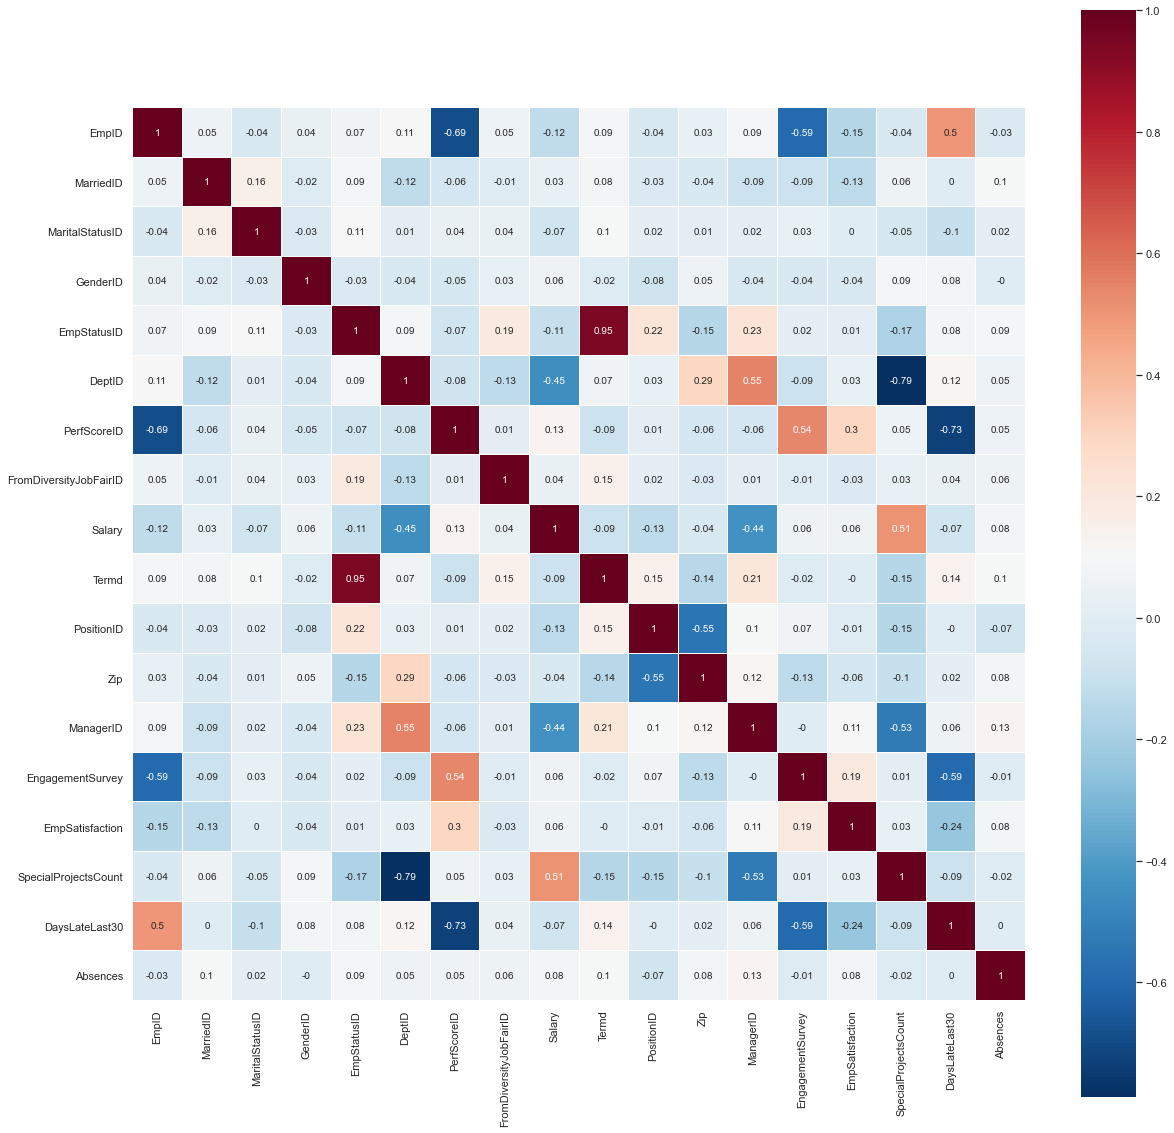

In [9]:
# heatmap - finding variables which are useful for prediction
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='RdBu_r',linewidths=0.2,square=True);

## Check Duplicates

In [10]:
# generate count statistics of duplicate entries
if len(df[df.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df[df.duplicated()]))
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


**Conclusion** Luckily there are no duplicates in this dataset.

## Nullvalues

In [11]:
#check null values
df.isnull().any()

Employee_Name                 False
EmpID                         False
MarriedID                     False
MaritalStatusID               False
GenderID                      False
EmpStatusID                   False
DeptID                        False
PerfScoreID                   False
FromDiversityJobFairID        False
Salary                        False
Termd                         False
PositionID                    False
Position                      False
State                         False
Zip                           False
DOB                           False
Sex                           False
MaritalDesc                   False
CitizenDesc                   False
HispanicLatino                False
RaceDesc                      False
DateofHire                    False
DateofTermination              True
TermReason                    False
EmploymentStatus              False
Department                    False
ManagerName                   False
ManagerID                   

In [12]:
nan = pd.DataFrame(df.isnull().sum(),columns=['Count'])
nan['Percentage'] = round(nan.Count/df.shape[0]*100,1)
nan[nan.Count!=0]

,Count,Percentage
DateofTermination,207,66.6
ManagerID,8,2.6


<AxesSubplot:>

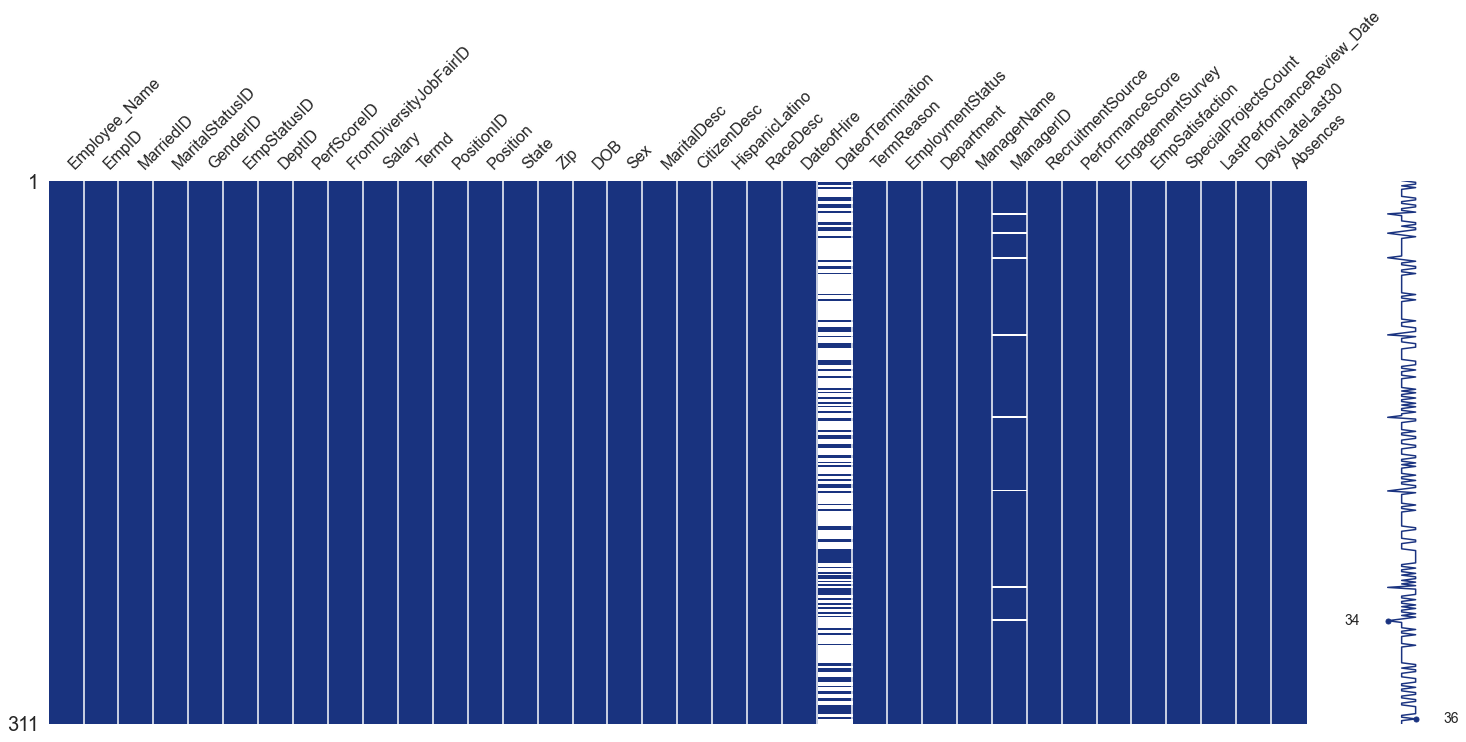

In [13]:
# visualizing missing values with a heatmap
msno.matrix(df, color=(0.1, 0.2, 0.5)) 

**Conclusion**

As we can see, there are lots of missing values in the column "date of termination" and some in "manager ID". As there are only some employees who left the company, we will fill these missing values for "date of termination with "still employed". And change the dates after investigation with "left company". 

# Data Cleaning

## Dealing with missing values

In [14]:
# filling NaN for media game with "not a game"
df['DateofTermination'] = df['DateofTermination'].replace(np.nan, "still employed")

In [15]:
# remove rows with null values
df = df.dropna(axis=0)

In [16]:
df.shape

(303, 36)

# EDA

We'll start by taking a high-level look at the data provided. 

There are 36 features that describe each employee. I

## Overall Insights

In [17]:
# print categorical columns
categorical = df.select_dtypes(include = ['object'])
print(categorical.columns)

Index(['Employee_Name', 'Position', 'State', 'DOB', 'Sex', 'MaritalDesc',
       'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire',
       'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department',
       'ManagerName', 'RecruitmentSource', 'PerformanceScore',
       'LastPerformanceReview_Date'],
      dtype='object')


In [18]:
# print numerical colums
numerical = df.select_dtypes(include=['float64','int64'])
print(numerical.columns)

Index(['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences'],
      dtype='object')


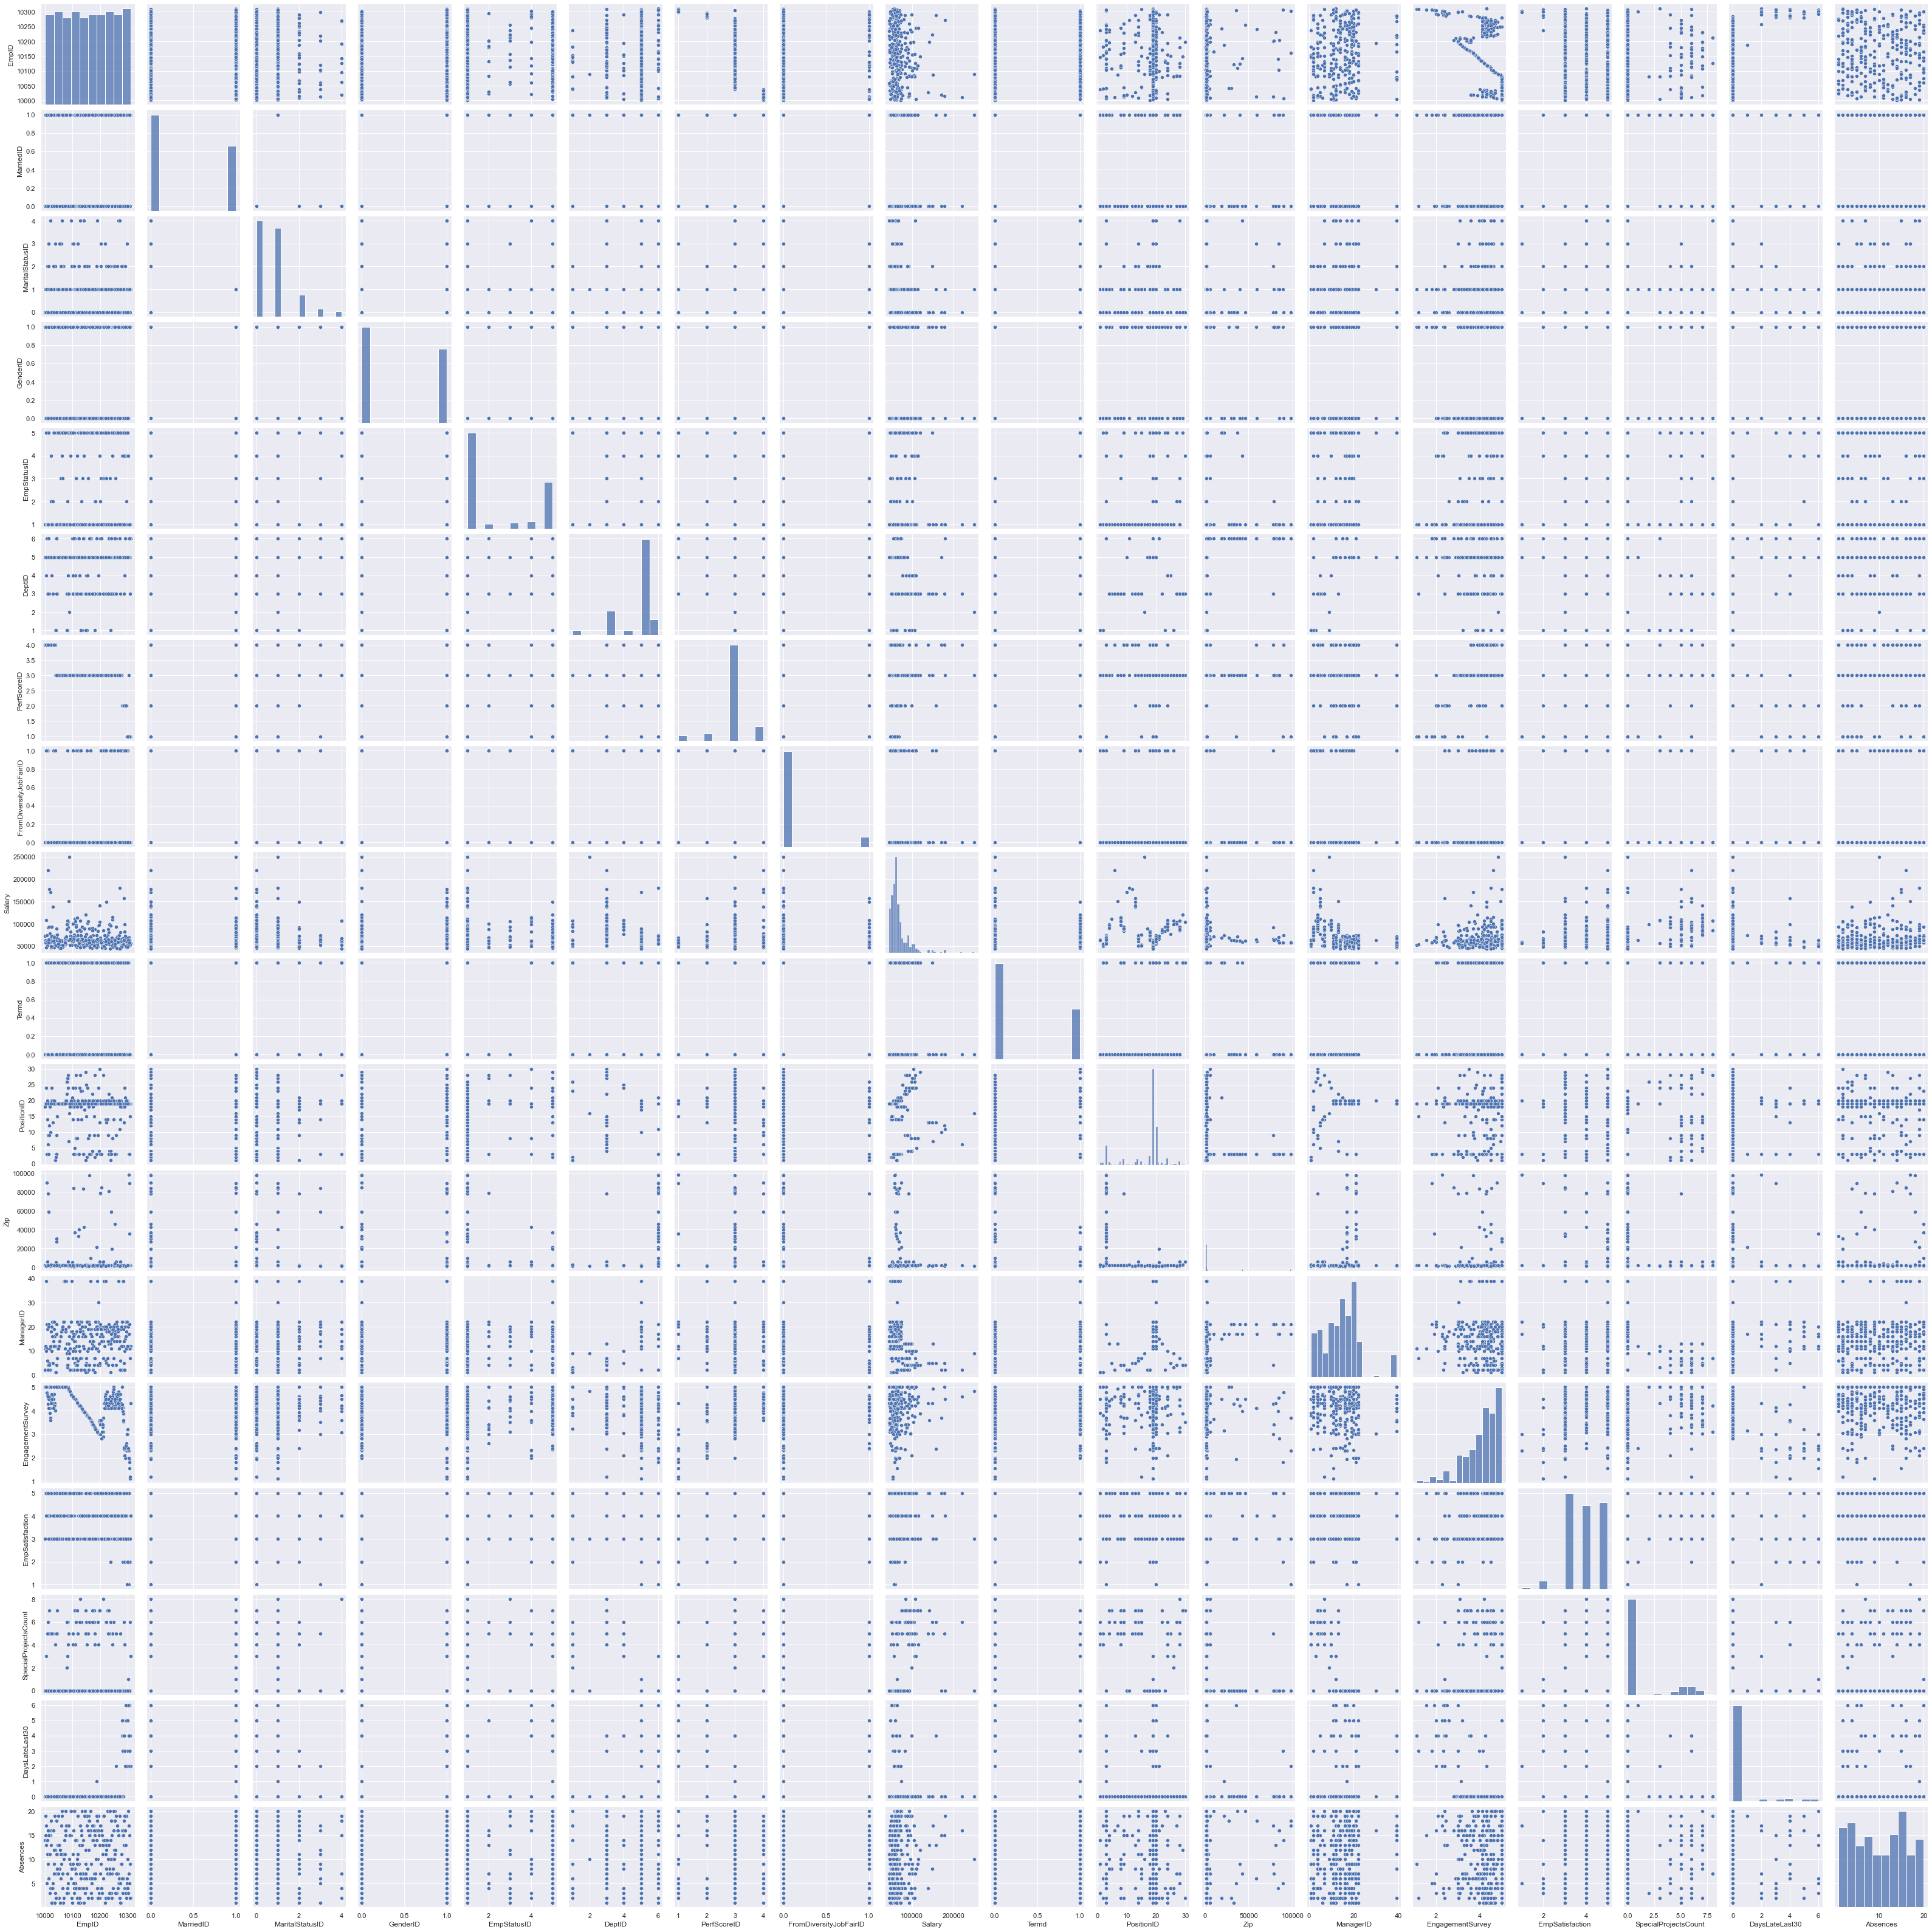

In [19]:
# pair plot with numeric features
sns.pairplot(df[['EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID',
       'DeptID', 'PerfScoreID', 'FromDiversityJobFairID', 'Salary', 'Termd',
       'PositionID', 'Zip', 'ManagerID', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'DaysLateLast30', 'Absences']])

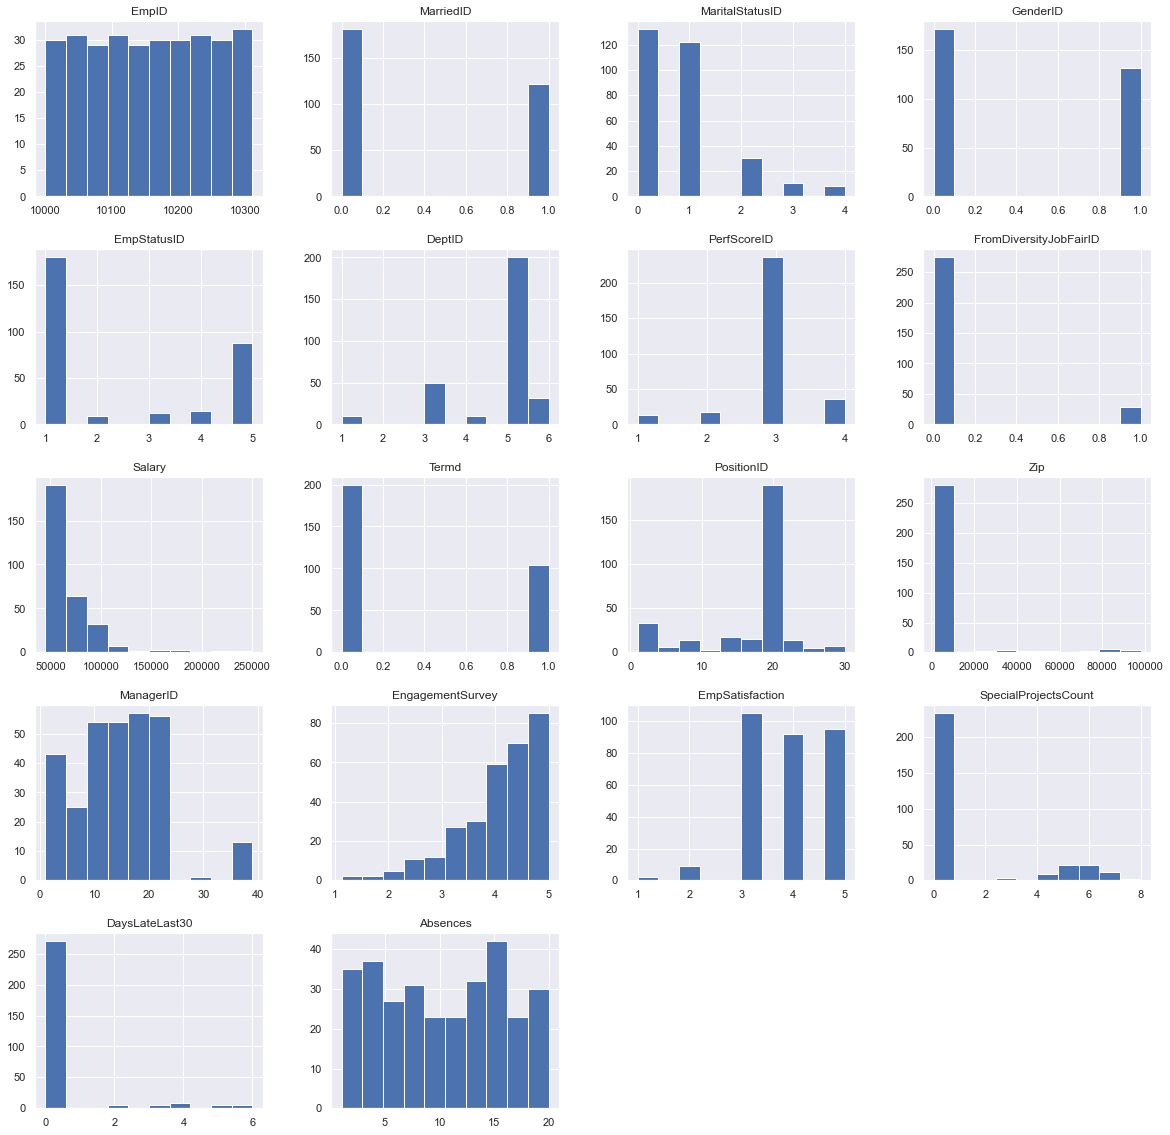

In [20]:
_ = df.hist(figsize=(20,20));

In [21]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

# Employee related information
'Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',

## Employee Name

In [22]:
df.Employee_Name.nunique()

303

**Conclusion** In our dataset there are 303 employees.

## Employee ID

In [23]:
df.EmpID.nunique()

303

**Conclusion** There are 303 different IDs for each employee one ID.

## Married ID

In [24]:
df.MarriedID.value_counts()

0    181
1    122
Name: MarriedID, dtype: int64

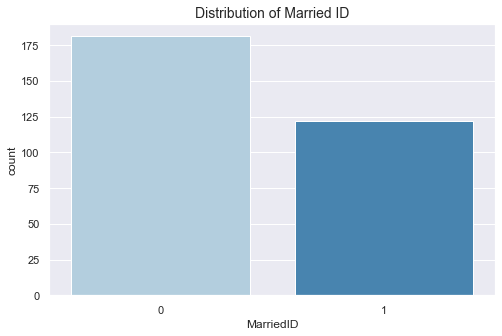

In [25]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="MarriedID", data=df, palette="Blues")
plt.title('Distribution of Married ID', fontsize=14);

**Conclusion** There are two different IDs. At this stage it's unclear if 0 is unmarried an 1 is married or the other way around.

## Marital Status ID

In [26]:
df.MaritalStatusID.value_counts()

0    132
1    122
2     30
3     11
4      8
Name: MaritalStatusID, dtype: int64

**Conclusion** There are 5 different types of martial status. From 0 up to 4. At this stage it's unclear which number stands for what.

## Martial Desc

In [27]:
df.MaritalDesc.value_counts()

Single       132
Married      122
Divorced      30
Separated     11
Widowed        8
Name: MaritalDesc, dtype: int64

**Conclusion** With the column "Martial Desc" we get a clear explanation for the column "Marital Status ID". So we can drop the column Marital Status ID later on, as it's redundant. 

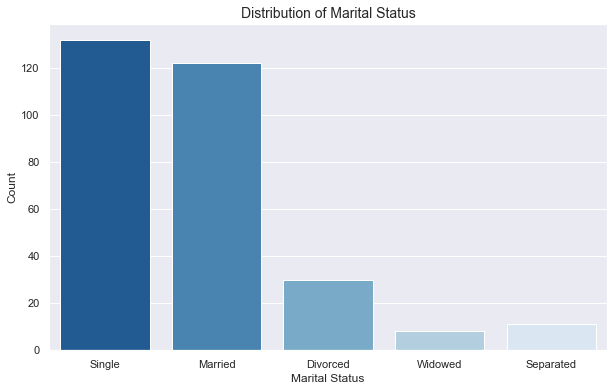

In [28]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x=df.MaritalDesc, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of Marital Status', fontsize=14)
plt.xlabel("Marital Status");
plt.ylabel("Count");

## Gender ID

In [29]:
df.GenderID.value_counts()

0    171
1    132
Name: GenderID, dtype: int64

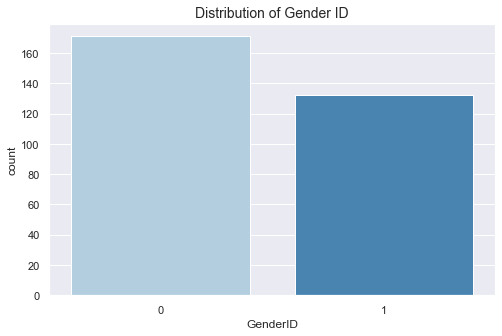

In [30]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot(x="GenderID", data=df, palette="Blues")
plt.title('Distribution of Gender ID', fontsize=14);

In [31]:
df[['GenderID', 'Employee_Name']]

,GenderID,Employee_Name
0,1,"Adinolfi, Wilson K"
1,1,"Ait Sidi, Karthikeyan"
2,0,"Akinkuolie, Sarah"
3,0,"Alagbe,Trina"
4,0,"Anderson, Carol"
...,...,...
306,1,"Woodson, Jason"
307,0,"Ybarra, Catherine"
308,0,"Zamora, Jennifer"
309,0,"Zhou, Julia"


**Conclusion** There are two different Gender IDs. 0 is for female and 1 is for male. So we do have more male employees (171) and less female employees (132).

## Sex

In [32]:
# For clarity:
df.replace({'Sex': {'F': 'Female', 'M ': 'Male'}}, inplace=True)
df.Sex.name = 'Gender'
# Now, to an overview in gender distribution:
print(df.Sex.value_counts(),'\n\n', (df.Sex.value_counts(normalize=True) * 100), sep='')

Female    171
Male      132
Name: Gender, dtype: int64

Female    56.435644
Male      43.564356
Name: Gender, dtype: float64


**Conclusion** Sex does have the same values as we saw in gender ID. As the columns "Sex" is clear in it's meaning, we can drop the column "Gender ID" later. The numbers are balanced, and most employees are female.

## State

In [33]:
df.State.nunique()

28

In [34]:
df.State.value_counts()

MA    268
CT      6
TX      3
VT      2
NY      1
OR      1
IN      1
CO      1
CA      1
ME      1
AZ      1
GA      1
NC      1
AL      1
MT      1
UT      1
OH      1
KY      1
ID      1
TN      1
NV      1
NH      1
FL      1
ND      1
VA      1
PA      1
RI      1
WA      1
Name: State, dtype: int64

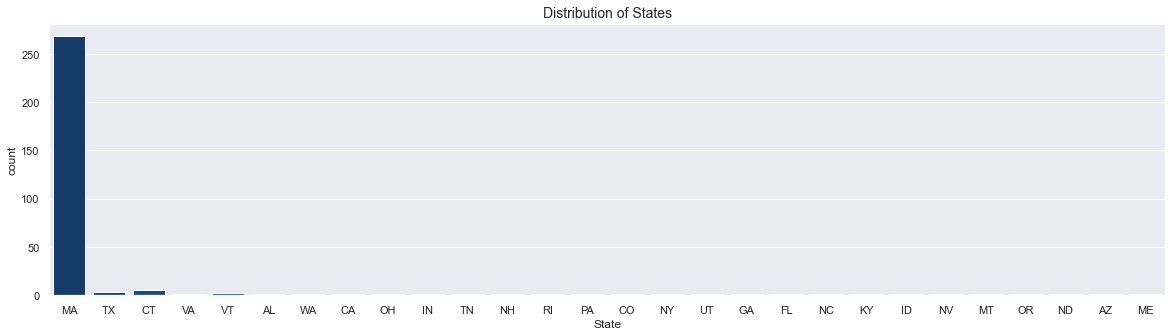

In [35]:
sns.set(rc={'figure.figsize':(20,5)})
sns.countplot(x="State", data=df, palette="Blues_r")
plt.title('Distribution of States', fontsize=14);

**Conclusion** We do have employees from 28 different states. Most of them are from the state MA (286).

## Zip

In [36]:
df.Zip

0      1960
1      2148
2      1810
3      1886
4      2169
       ... 
306    1810
307    2458
308    2067
309    2148
310    1730
Name: Zip, Length: 303, dtype: int64

In [37]:
df.Zip.nunique()

155

**Conclusion** We do have 155 different zip codes. As there is no value to investigate it at this stage. I will leave it and maybe come back to it later on.

## DOB (Date of Birth)

In [38]:
df.DOB.value_counts()

09/09/65    2
07/07/84    2
06/14/87    2
09/22/76    2
11/06/84    1
           ..
11/07/87    1
12/01/74    1
09/05/91    1
09/05/85    1
09/15/85    1
Name: DOB, Length: 299, dtype: int64

In [39]:
# Prepare for splitting
df['DOB'] = pd.to_datetime(df['DOB']).dt.date.astype('datetime64')

In [40]:
# No employees were born after year 2000, so DOBs like 2068 should have 100 years removed:
df.loc[df.DOB.dt.year > 2000, 'DOB'] -= pd.DateOffset(years=100)
# Now, to getting the age:
df['Age'] = pd.Series(dtype='int')
for ind, date in df.DOB.iteritems():
    df.loc[ind, 'Age'] = relativedelta(
        pd.to_datetime('today'), date).years
df.Age = df.Age.astype('int64')

In [41]:
#Some summary statistics
df['Age'].apply(['min', 'median', 'max'])

min       28.0
median    40.0
max       69.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='count'>

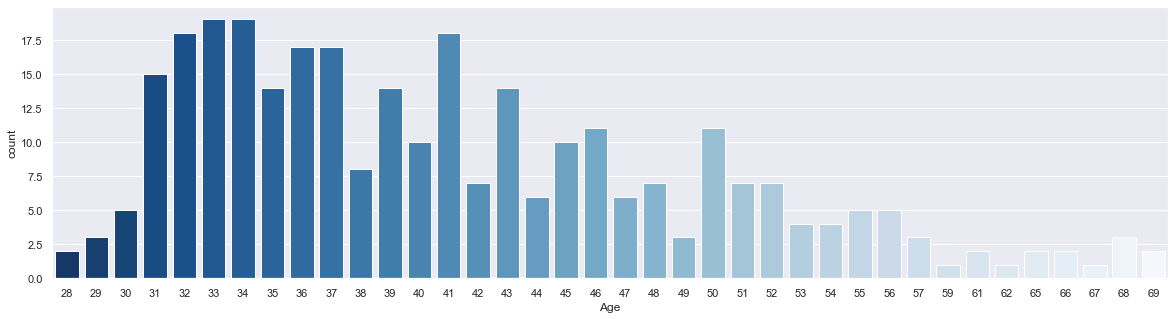

In [42]:
sns.countplot(x=df['Age'], palette="Blues_r")

**Conclusion** The staff's ages are mainly at early to mid-30s, also counting high at early 40s. The number of employees is substantially lower for ages 53 and over.

Considering how low the numbers go when it comes to older workers, it's important that we inquire how age diversity is promoted through recruiting.

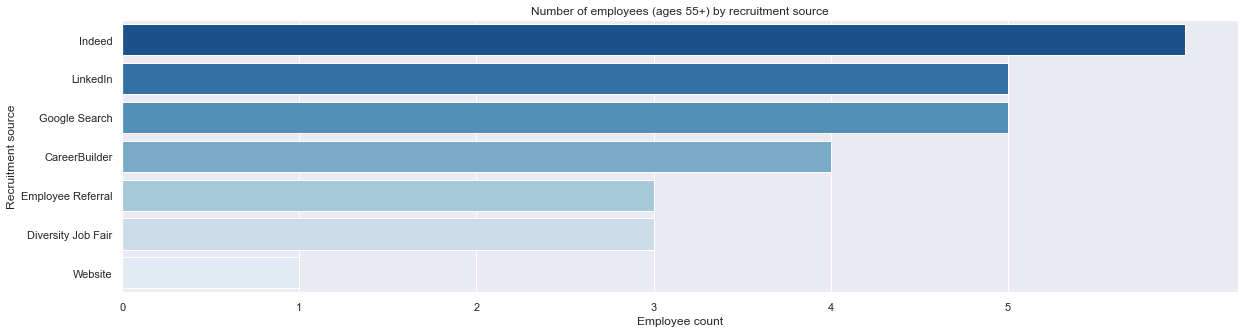

In [43]:
#recruiting +55 years employees
over_55 = df.loc[df.Age >= 55, 'RecruitmentSource'].value_counts()
ax = sns.barplot(x=over_55.values,y=over_55.index, palette="Blues_r")
ax.set_ylabel('Recruitment source'), ax.set_xlabel('Employee count'), ax.set_xticks(range(6))
ax.set_title('Number of employees (ages 55+) by recruitment source');

**Conclusion** Indeed scores the highest, hiring +55 employees, followed by Linkedin. But the numbers are really low, in such a way that no source is currently bringing a reasonable amount of older people to the company.

<AxesSubplot:xlabel='Age', ylabel='Salary'>

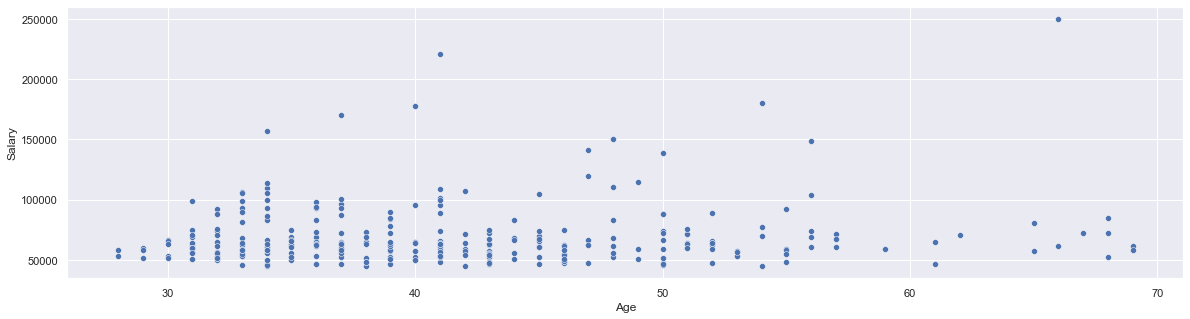

In [44]:
#Check Age and Salary
sns.scatterplot(x="Age", y="Salary", data=df, palette="Blues_r" )

## Citizen Desc

In [45]:
df.CitizenDesc.value_counts()

US Citizen             287
Eligible NonCitizen     12
Non-Citizen              4
Name: CitizenDesc, dtype: int64

In [46]:
for state in df['CitizenDesc'].unique():
    if state != 'US Citizen':
        df.replace(state, 'non-US Citizen', inplace=True)

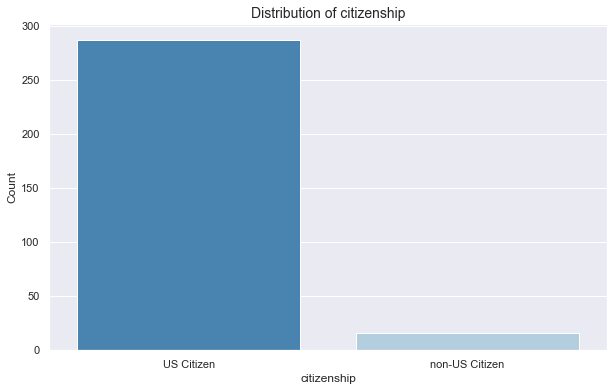

In [47]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x=df.CitizenDesc, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of citizenship', fontsize=14)
plt.xlabel("citizenship");
plt.ylabel("Count");

**Conclusion** Most of the employees ar US Citizen (287). There are some which are eligible noncitizen or non-citizen.

## Hispanic Latino

In [48]:
df.HispanicLatino.value_counts()

No     274
Yes     27
no       1
yes      1
Name: HispanicLatino, dtype: int64

In [49]:
# display  
df['HispanicLatino'] = df['HispanicLatino'].str.upper() 
df.HispanicLatino.value_counts()

NO     275
YES     28
Name: HispanicLatino, dtype: int64

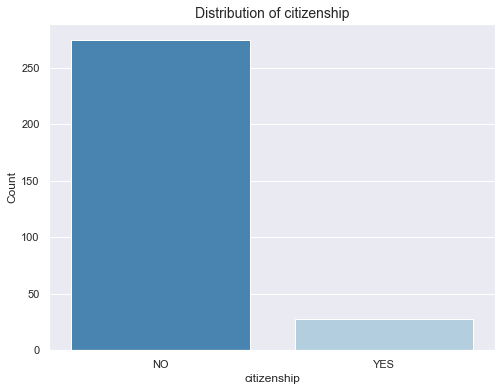

In [50]:
sns.set(rc={'figure.figsize':(8,6)})
sns.countplot(x=df.HispanicLatino, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of citizenship', fontsize=14)
plt.xlabel("citizenship");
plt.ylabel("Count");

**Conclusion** First I changed the valies "no" and "yes" to upper cases to count them the right way. We do have 275 employees which are not Hispanic / Latino and 28 which are. 

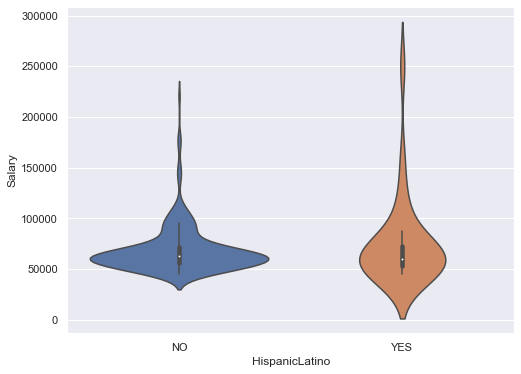

In [51]:
sns.violinplot(x='HispanicLatino', y='Salary', data = df);

## Race Desc.

In [128]:
#transform "American Indian or Alaska Native", "Two or more races" and "Hispanic" into one category "others"
df['RaceDesc'].replace('American Indian or Alaska Native', 'Others', inplace=True)
df['RaceDesc'].replace('Two or more races', 'Others', inplace=True)
df['RaceDesc'].replace('Hispanic', 'Others', inplace=True)

In [129]:
# A first look at the racial diversity situation - both in absolute and percentual figures:
df.RaceDesc.name = 'Racial group'
display(df.RaceDesc.value_counts(),
        df.RaceDesc.value_counts(normalize=True) * 100)

White                        182
Black or African American     79
Asian                         26
Others                        15
Name: Racial group, dtype: int64

White                        60.264901
Black or African American    26.158940
Asian                         8.609272
Others                        4.966887
Name: Racial group, dtype: float64

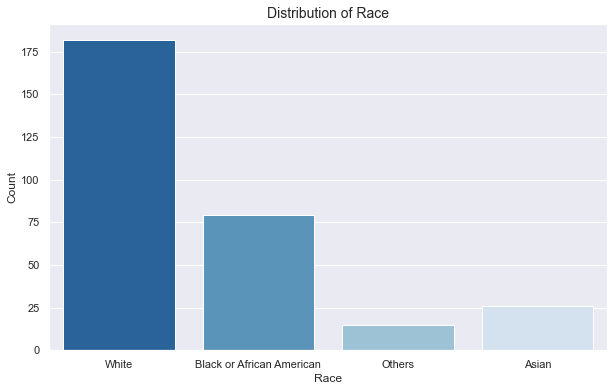

In [127]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x=df.RaceDesc, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of Race', fontsize=14)
plt.xlabel("Race");
plt.ylabel("Count");

**Conclusion** As we can see most employees are categorized as "white".

# Job related information
 'EmpStatusID', 'DeptID', 'PositionID', 'Position', 'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus', 'Department', 'ManagerName', 'ManagerID', 'DaysLateLast30',
       'Absences'

## Employee Status ID

In [55]:
df.EmpStatusID.value_counts()

1    180
5     88
4     14
3     12
2      9
Name: EmpStatusID, dtype: int64

**Conclusion** At this stage it's not clear what the numbers mean.

## Department ID

In [56]:
df.DeptID.value_counts()

5    200
3     50
6     32
4     10
1     10
2      1
Name: DeptID, dtype: int64

**Conclusion** We do have 6 different Department IDs. But at this stage it's not clear which departments.

##  Department

In [57]:
df.Department.value_counts()

Production              201
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

**Conclusion** We do have 6 different Departments which might be related to the Department ID. But there are some slight diffrences which we need to investigate.

In [58]:
# I'll remove the one value for Executive Office (outlier)
df.drop(df[df['Department'] == 'Executive Office'].index, axis=0, inplace=True)

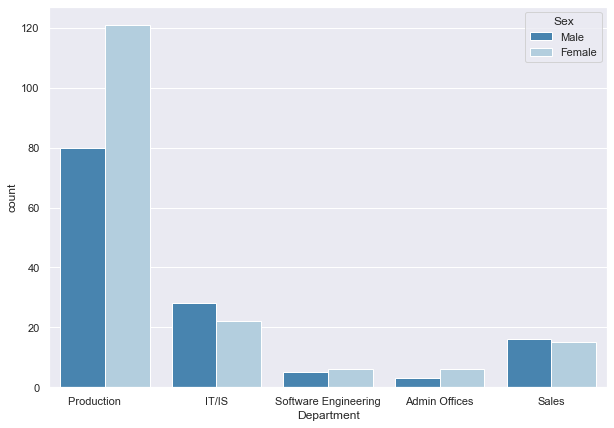

In [132]:
# Gender diversity across departmets
plt.figure(figsize=(10,7))
ax=sns.countplot(x=df['Department'],hue=df['Sex'], palette="Blues_r")

**Conclusion** In the following departments there are more female than male employees: 
* Production 
* Software Engineering
* Admin Offices 

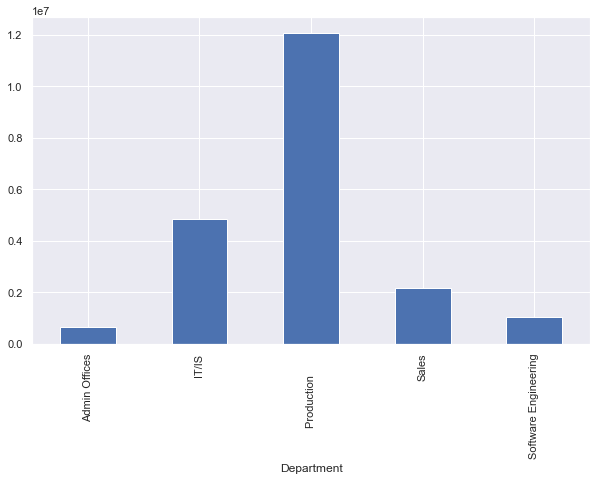

In [139]:
#payment per department (average)
total_depcosts = df.groupby('Department')['Salary'].sum().plot(kind='bar');

In [142]:
total_depcosts = df.groupby('Department')['Salary'].sum()
total_depcosts.sort_values(ascending=False)

Department
Production              12060430
IT/IS                    4853232
Sales                    2140899
Software Engineering     1044884
Admin Offices             646127
Name: Salary, dtype: int64

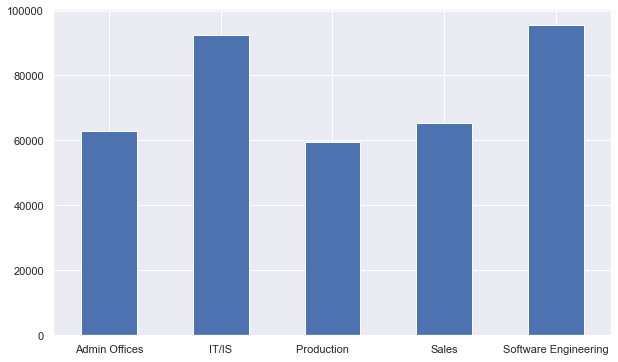

In [138]:
#payment per department (average)
df.groupby('Department')['Salary'].median().plot(kind='bar');
plt.xticks(rotation=0);
plt.xlabel("");

**Conclusion** 
In total there are the highest salary costs in the production department
* Production (12.060.430 USD) 
* IT / IS (4.853.232 USD)
* Sales (2.140.899 USD)
* Software Engineering (1.044.884 USD)
* Admin Offices (646.127 USD)

In average we can find the highest salary in the IT/IS and Software Engineering Department


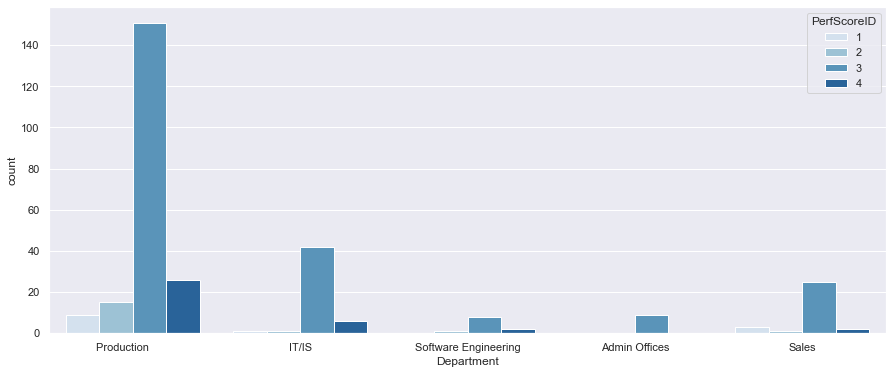

In [144]:
#Exploring how each department scores on their performances
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Department',hue='PerfScoreID', palette="Blues");

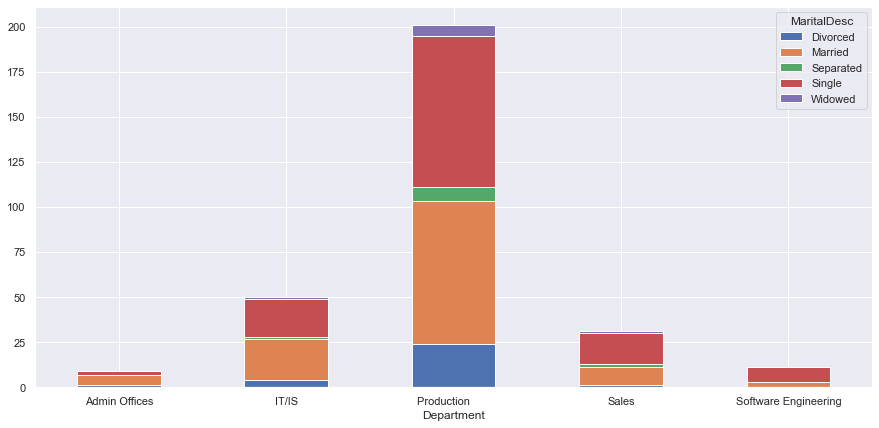

In [157]:
#marital status per department 
clarity_color_table = pd.crosstab(index=df["Department"], 
                          columns=df["MaritalDesc"])

clarity_color_table.plot(kind="bar", 
                 figsize=(15,7),
                 stacked=True);
plt.xticks(rotation=0);

**Conclusion** No surprise, most employees in each department asre single or married. In the production department we do have most divorced employees.

## Position ID

In [63]:
df.PositionID.nunique()

29

In [64]:
df.PositionID.value_counts()

19    133
20     53
3      27
18     13
24      9
14      8
9       8
15      5
28      5
8       5
4       4
13      4
2       3
1       3
21      3
22      3
23      2
26      2
27      2
29      1
17      1
12      1
11      1
10      1
7       1
6       1
5       1
25      1
30      1
Name: PositionID, dtype: int64

**Conclusion** We do have 30 different Position IDs. But it's not clear what each ID stands for.

## Position

In [65]:
df.Position.nunique()

31

In [66]:
df.Position.value_counts()

Production Technician I         133
Production Technician II         53
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Network Engineer                  5
Sr. Network Engineer              5
Database Administrator            5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Accountant I                      3
Sales Manager                     3
Sr. Accountant                    2
IT Manager - DB                   2
Sr. DBA                           2
Software Engineering Manager      1
BI Director                       1
Principal Data Architect          1
Director of Operations            1
IT Manager - Infra                1
IT Director                       1
Director of Sales                 1
Enterprise Architect              1
CIO                               1
Data Architect              

**Conclusion** As we can see, most employees work as a Production Technician I (133) followed by Production Technician II (53). There are some positions mentioned just once.

## ManagerID

In [67]:
df.ManagerID.nunique()

23

In [68]:
df.ManagerID.value_counts(ascending=False)

18.0    22
20.0    22
16.0    22
12.0    22
14.0    21
11.0    21
19.0    21
22.0    21
2.0     19
4.0     17
17.0    14
7.0     14
21.0    13
39.0    13
10.0     9
13.0     8
5.0      7
1.0      6
6.0      4
15.0     3
3.0      1
9.0      1
30.0     1
Name: ManagerID, dtype: int64

**Conclusion** There are 23 different Manager IDs. Some of the mentioned more often that others.

## ManagerName

In [69]:
df.ManagerName.nunique()

21

In [70]:
df.ManagerName.value_counts(ascending=False)

Kissy Sullivan        22
Kelley Spirea         22
Michael Albert        22
Elijiah Gray          22
Brannon Miller        22
Amy Dunn              21
David Stanley         21
Ketsia Liebig         21
Janet King            19
Simon Roup            17
John Smith            14
Peter Monroe          14
Webster Butler        13
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Jennifer Zamora        7
Brandon R. LeBlanc     7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     1
Name: ManagerName, dtype: int64

**Conclusion** We do have 21 different manager names. So there is a slightly different number compared to the Manager IDs. This should be investigated later on

<AxesSubplot:xlabel='count', ylabel='ManagerName'>

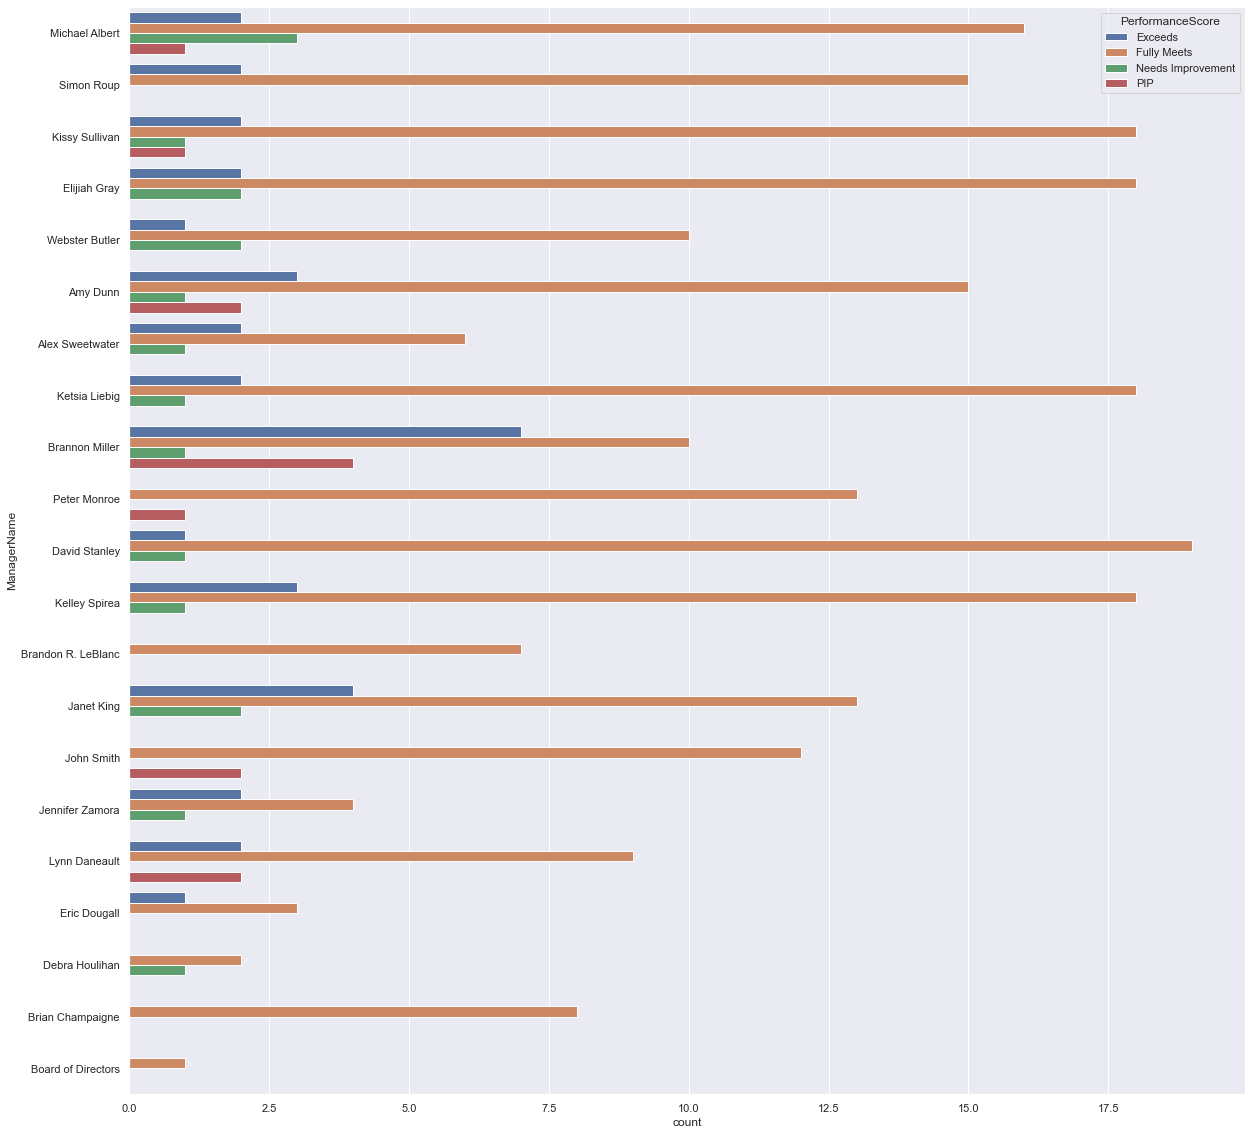

In [71]:
# which manager has the best performers 
plt.figure(figsize=(20,20))
sns.countplot(y=df['ManagerName'], hue=df['PerformanceScore']);

In [169]:
#performance per manager (average)
PerfScore_Manager = df.groupby('ManagerName')['PerfScoreID'].mean()
PerfScore_Manager

ManagerName
Alex Sweetwater       3.111111
Amy Dunn              2.904762
Board of Directors    3.000000
Brandon R. LeBlanc    3.000000
Brannon Miller        2.818182
Brian Champaigne      3.000000
David Stanley         3.000000
Debra Houlihan        2.666667
Elijiah Gray          3.000000
Eric Dougall          3.250000
Janet King            3.105263
Jennifer Zamora       3.142857
John Smith            2.714286
Kelley Spirea         3.090909
Ketsia Liebig         3.047619
Kissy Sullivan        2.954545
Lynn Daneault         3.000000
Michael Albert        2.863636
Peter Monroe          2.857143
Simon Roup            3.117647
Webster Butler        2.923077
Name: PerfScoreID, dtype: float64

In [182]:
HighPerformer = df.loc[df['PerfScoreID'] >= 3]
HighPerformer['ManagerName'].value_counts()

Kelley Spirea         21
Kissy Sullivan        20
Ketsia Liebig         20
Elijiah Gray          20
David Stanley         20
Amy Dunn              18
Michael Albert        18
Janet King            17
Simon Roup            17
Brannon Miller        16
Peter Monroe          13
John Smith            12
Lynn Daneault         12
Webster Butler        11
Alex Sweetwater        8
Brian Champaigne       8
Brandon R. LeBlanc     7
Jennifer Zamora        6
Eric Dougall           4
Debra Houlihan         2
Board of Directors     1
Name: ManagerName, dtype: int64

In [181]:
LowPerformer = df.loc[df['PerfScoreID'] <= 2]
LowPerformer['ManagerName'].value_counts()

Brannon Miller     6
Michael Albert     4
Amy Dunn           3
Janet King         2
John Smith         2
Elijiah Gray       2
Webster Butler     2
Kissy Sullivan     2
Debra Houlihan     1
David Stanley      1
Ketsia Liebig      1
Peter Monroe       1
Kelley Spirea      1
Jennifer Zamora    1
Alex Sweetwater    1
Lynn Daneault      1
Name: ManagerName, dtype: int64

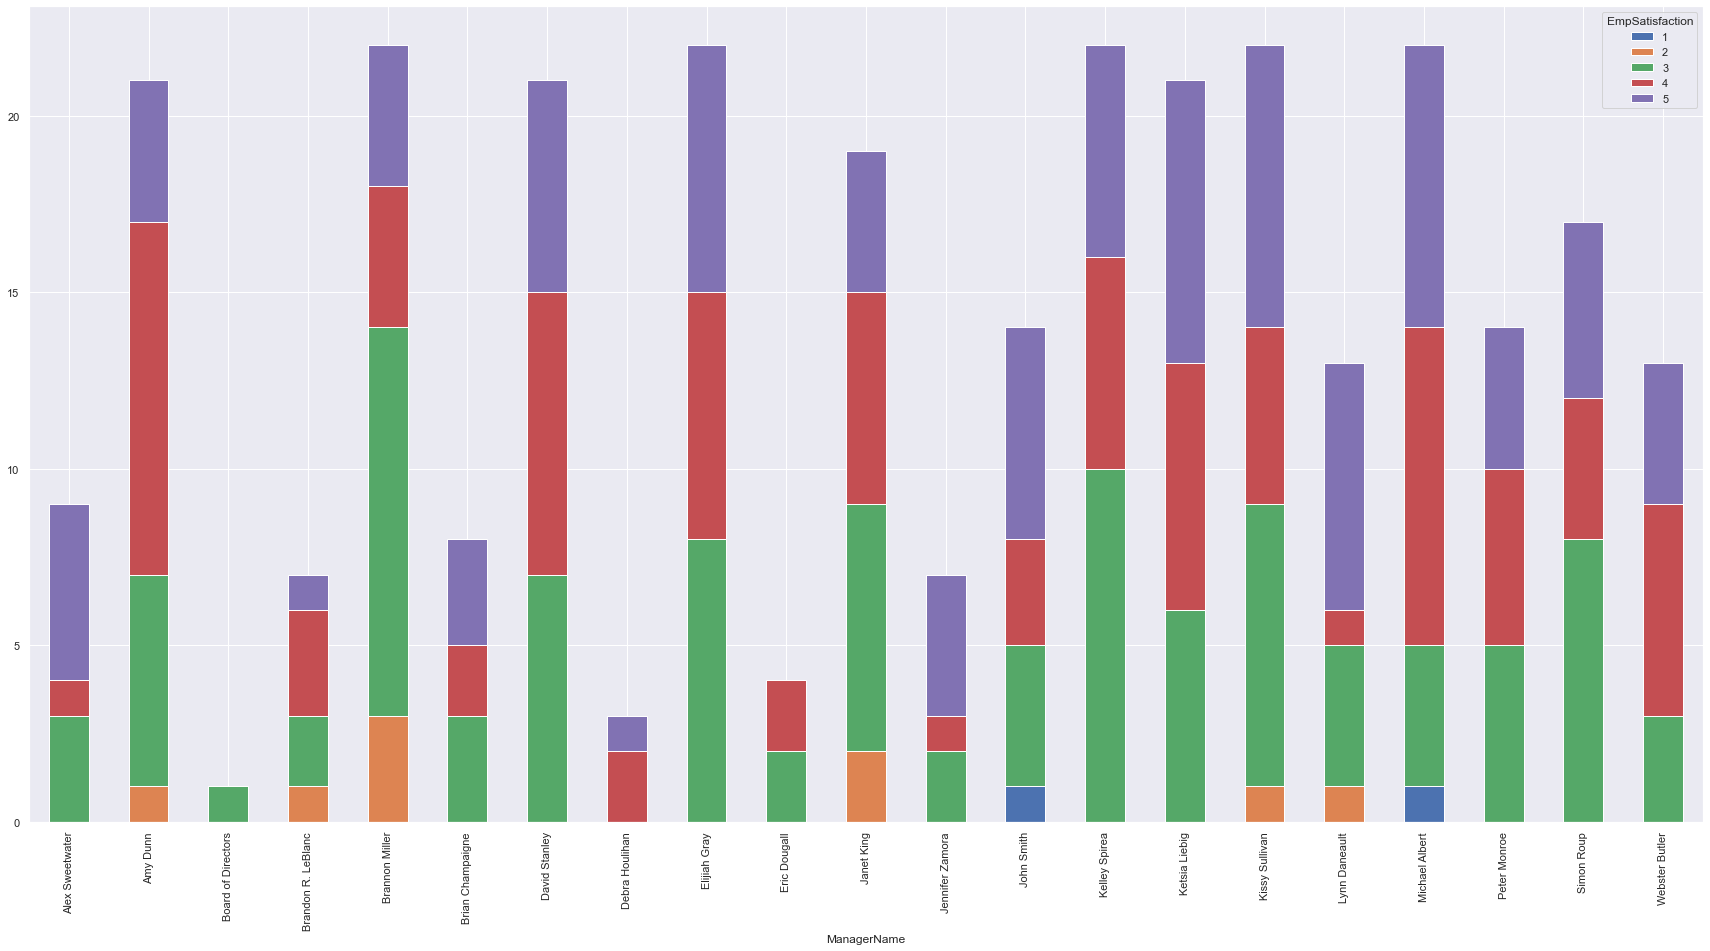

In [72]:
# which manager has the most satisfied employees 
manag_emplsat = df.groupby(['ManagerName', 'EmpSatisfaction']).size().reset_index()
manag_emplsat.columns = ['ManagerName','EmpSatisfaction','Count']
manag_emplsat=manag_emplsat.pivot(columns='EmpSatisfaction', index='ManagerName', values='Count')
manag_emplsat.plot(kind='bar',stacked=True,figsize=(30,15));

## Date of hire

In [73]:
df.DateofHire.value_counts()

1/10/2011     14
3/30/2015     12
1/5/2015      11
7/5/2011      10
9/29/2014     10
              ..
7/9/2018       1
9/6/2011       1
10/26/2009     1
1/20/2013      1
9/2/2008       1
Name: DateofHire, Length: 99, dtype: int64

In [74]:
#check days emplyed and salary
#df2.plot(x='Days Employed',y='Pay Rate',kind='scatter')

#### Prepare for splitting

In [75]:
# change Date-times airing first broadcast
df['DateofHire'] = pd.to_datetime(df['DateofHire'])

In [76]:
# split date to year and month and delete deadline later 
df["year_DateofHire"] = df['DateofHire'].dt.year 
df["month_DateofHire"] = df['DateofHire'].dt.month 
df["day_DateofHire"] = df['DateofHire'].dt.day

#### Explore new date times feature "year DOB"

In [184]:
print('No. of employees hired per year') 
print(df.year_DateofHire.groupby(df.year_DateofHire).agg('count'))

No. of employees hired per year
year_DateofHire
2006     1
2007     2
2008     3
2009     7
2010     9
2011    82
2012    44
2013    41
2014    58
2015    35
2016    13
2017     6
2018     1
Name: year_DateofHire, dtype: int64


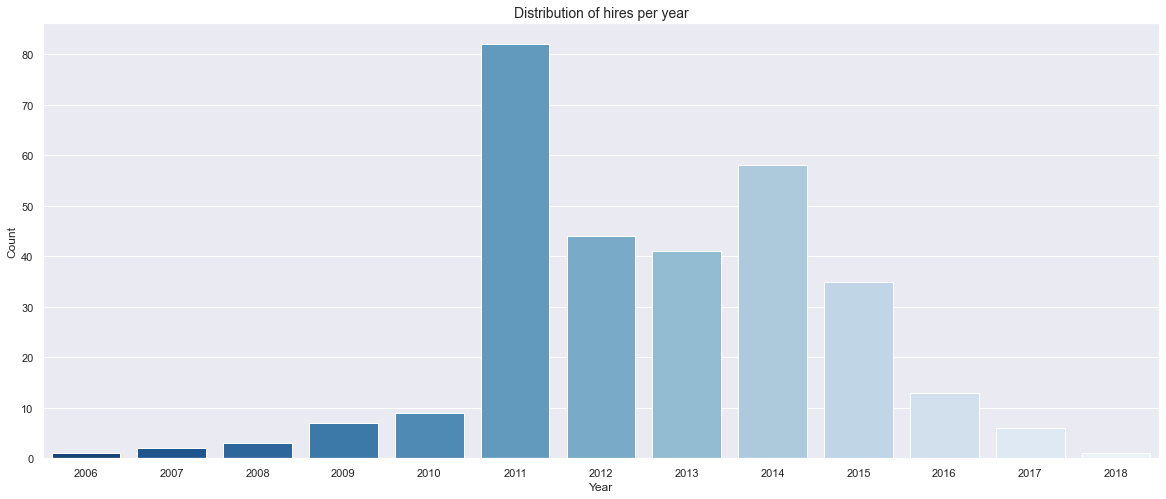

In [185]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x=df.year_DateofHire, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of hires per year', fontsize=14)
plt.xlabel("Year");
plt.ylabel("Count");

#### Explore new date times feature "month DateofHire"

In [79]:
print('No. of hires per month') 
print(df.month_DateofHire.groupby(df.month_DateofHire).agg('count').sort_values(ascending=False))

No. of hires per month
month_DateofHire
1     54
7     41
9     37
5     32
2     30
11    27
4     27
8     20
3     19
10     7
6      7
12     1
Name: month_DateofHire, dtype: int64


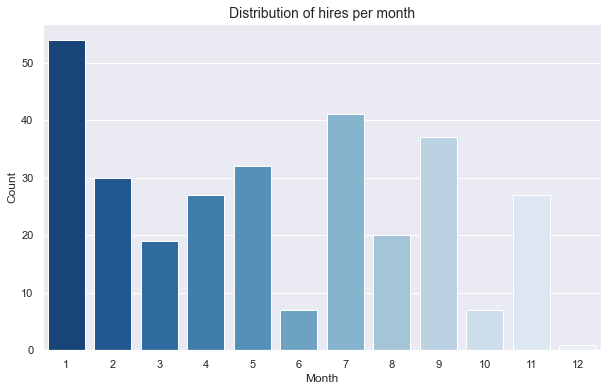

In [80]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x=df.month_DateofHire, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of hires per month', fontsize=14)
plt.xlabel("Month");
plt.ylabel("Count");

#### Explore new date times feature "day DateofHire"

In [81]:
print('No. employees hired per day') 
print(df.day_DateofHire.groupby(df.day_DateofHire).agg('count').sort_values(ascending=False))

No. employees hired per day
day_DateofHire
5     35
7     26
30    26
10    25
16    19
2     17
26    12
6     12
9     11
11    11
29    10
15     8
4      8
20     8
8      8
12     7
1      7
18     7
21     7
13     6
17     6
19     6
14     4
27     4
31     4
24     3
25     2
28     2
3      1
Name: day_DateofHire, dtype: int64


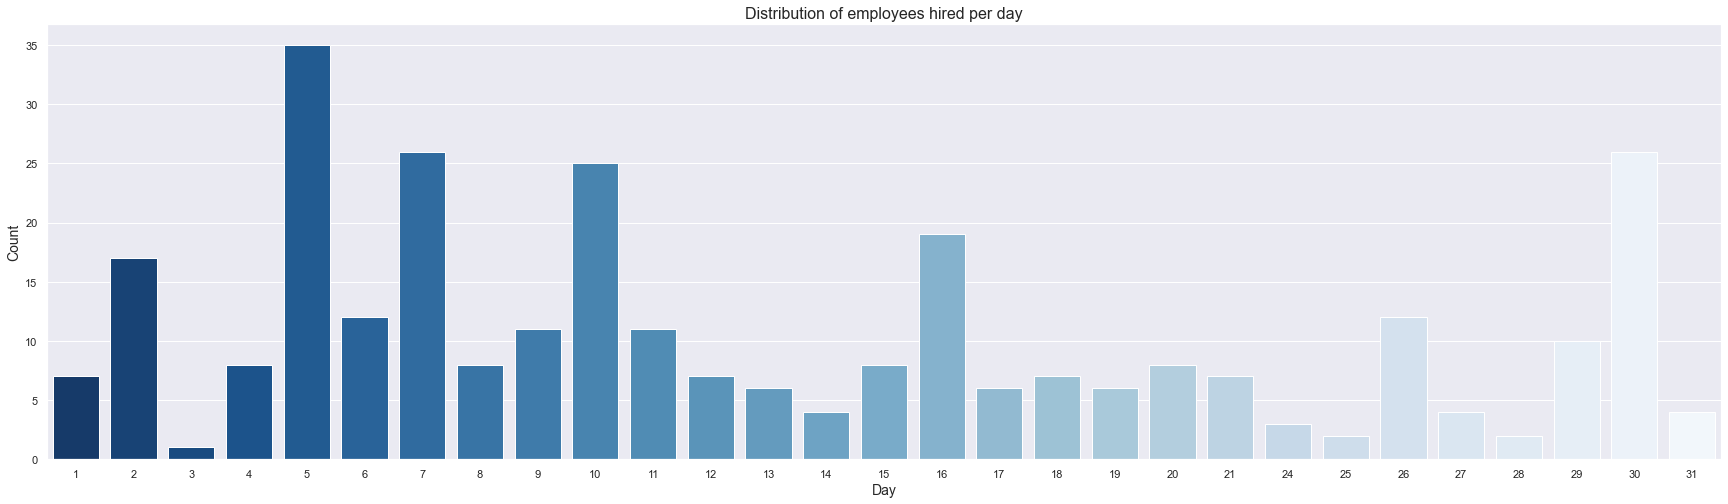

In [82]:
sns.set(rc={'figure.figsize':(30,8)})
sns.countplot(x=df.day_DateofHire, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of employees hired per day', fontsize=16)
plt.xlabel("Day", fontsize=14);
plt.ylabel("Count", fontsize=14);

## Date of Termination

In [83]:
df.DateofTermination.value_counts()

still employed    198
11/4/2015           2
9/7/2015            2
4/1/2013            2
8/19/2018           2
                 ... 
5/30/2011           1
11/15/2015          1
6/29/2015           1
4/29/2018           1
5/15/2014           1
Name: DateofTermination, Length: 97, dtype: int64

#### Prepare for splitting

In [206]:
# change Date-times airing first broadcast
term_date = df.loc[(df['DateofTermination'] != 'still employed')]

In [208]:
term_date['DateofTermination'] = pd.to_datetime(term_date['DateofTermination'])

<ipython-input-208-efd4b8f57682>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_date['DateofTermination'] = pd.to_datetime(term_date['DateofTermination'])


In [212]:
# split date to year and month and delete deadline later 
term_date["year_DateofTermination"] = term_date['DateofTermination'].dt.year 
term_date["month_DateofTermination"] = term_date['DateofTermination'].dt.month 
term_date["day_DateofTermination"] = term_date['DateofTermination'].dt.day

<ipython-input-212-796125701425>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_date["year_DateofTermination"] = term_date['DateofTermination'].dt.year
<ipython-input-212-796125701425>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  term_date["month_DateofTermination"] = term_date['DateofTermination'].dt.month
<ipython-input-212-796125701425>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

#### Explore new date times feature "year term_date"

In [213]:
term_date.year_DateofTermination

1                          2016.0
2                          2012.0
4                          2016.0
10                         2017.0
11                         2016.0
                            ...  
307                        2015.0
DateofTermination             NaN
year_DateofTermination        NaN
month_DateofTermination       NaN
day_DateofTermination         NaN
Name: year_DateofTermination, Length: 108, dtype: float64

In [215]:
print('No. of employees termed per year') 
print(term_date.year_DateofTermination.groupby(term_date.year_DateofTermination).agg('count'))

No. of employees termed per year
year_DateofTermination
2010.0     1
2011.0     3
2012.0     8
2013.0    13
2014.0    13
2015.0    23
2016.0    22
2017.0     8
2018.0    13
Name: year_DateofTermination, dtype: int64


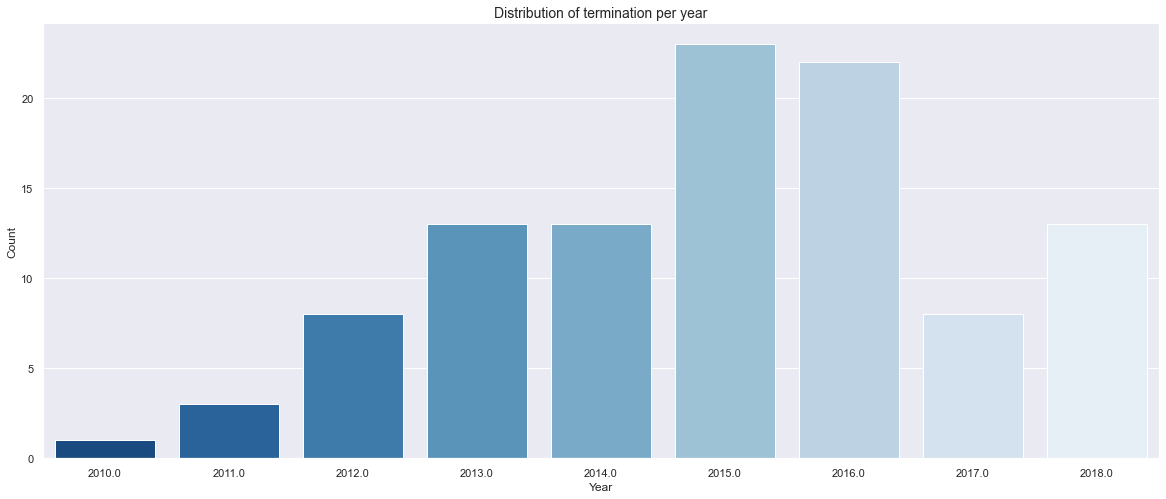

In [216]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x=term_date.year_DateofTermination, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of termination per year', fontsize=14)
plt.xlabel("Year");
plt.ylabel("Count");

#### Explore new date times feature "month term_date"

In [217]:
print('No. of terminations per month') 
print(term_date.month_DateofTermination.groupby(term_date.month_DateofTermination).agg('count').sort_values(ascending=False))

No. of terminations per month
month_DateofTermination
9.0     20
4.0     14
6.0     13
8.0     10
5.0      9
2.0      9
1.0      9
11.0     8
10.0     4
12.0     3
7.0      3
3.0      2
Name: month_DateofTermination, dtype: int64


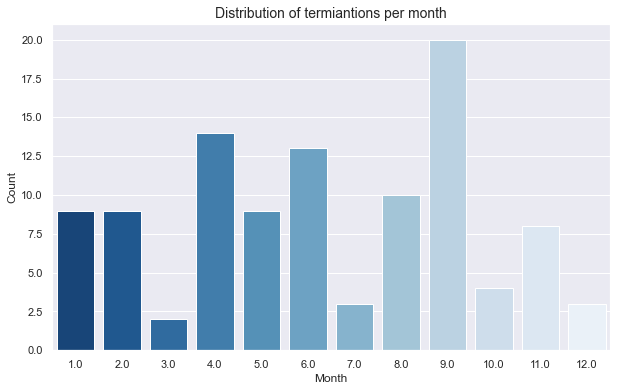

In [218]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x=term_date.month_DateofTermination, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of terminations per month', fontsize=14)
plt.xlabel("Month");
plt.ylabel("Count");

#### Explore new date times feature "day term_date"

In [219]:
print('No. employees hired per day') 
print(term_date.day_DateofTermination.groupby(term_date.day_DateofTermination).agg('count').sort_values(ascending=False))

No. employees hired per day
day_DateofTermination
15.0    13
4.0      9
1.0      6
7.0      6
19.0     6
25.0     5
8.0      5
12.0     5
30.0     4
5.0      4
26.0     4
24.0     4
2.0      3
6.0      3
31.0     3
18.0     3
29.0     3
17.0     2
14.0     2
11.0     2
9.0      2
22.0     2
27.0     2
13.0     1
10.0     1
21.0     1
23.0     1
28.0     1
16.0     1
Name: day_DateofTermination, dtype: int64


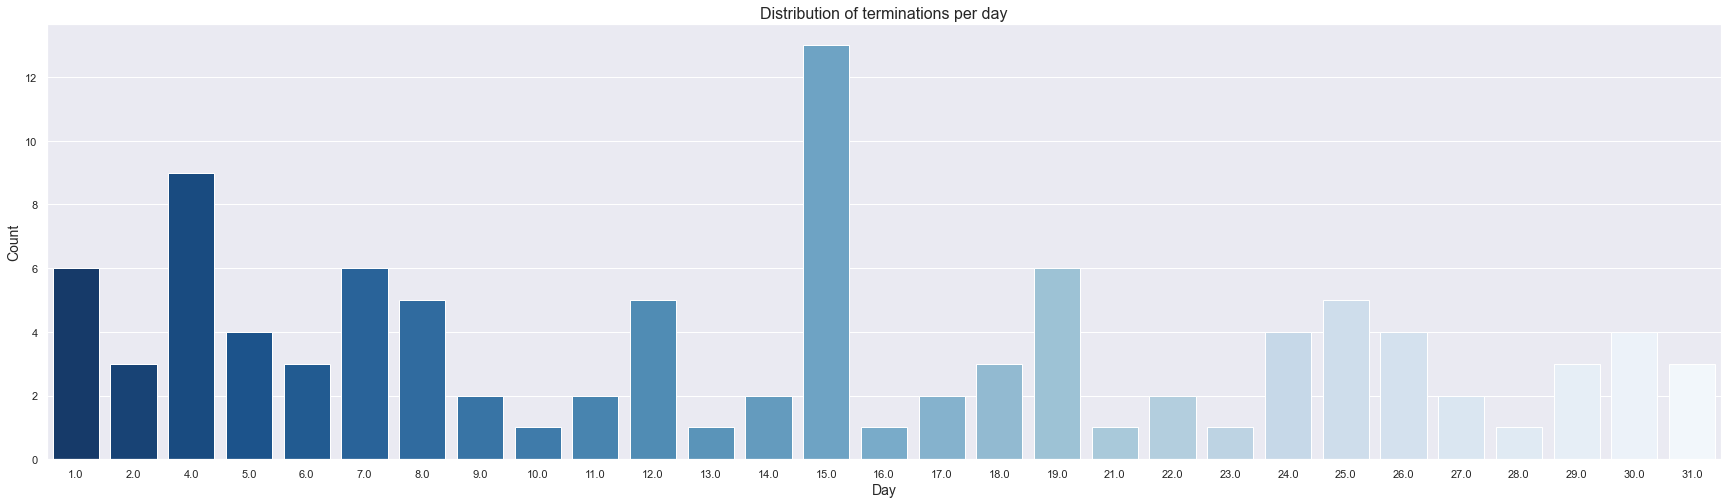

In [220]:
sns.set(rc={'figure.figsize':(30,8)})
sns.countplot(x=term_date.day_DateofTermination, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of terminations per day', fontsize=16)
plt.xlabel("Day", fontsize=14);
plt.ylabel("Count", fontsize=14);

**Conclusions** Most employees left the company in 2015 followed by 2016. And if we take a closer look on the month (over all years) most employees left in september followed by april.

## Term Reason

In [84]:
df.TermReason.value_counts()

N/A-StillEmployed                   198
Another position                     20
unhappy                              14
more money                           11
career change                         9
hours                                 8
attendance                            7
return to school                      5
relocation out of area                5
performance                           4
no-call, no-show                      4
retiring                              4
military                              4
maternity leave - did not return      3
medical issues                        3
Learned that he is a gangster         1
Fatal attraction                      1
gross misconduct                      1
Name: TermReason, dtype: int64

**Conclusion** Most employees are still employed (199). The reason why most employees left the company is "another position" (20), followed by "unhappy" (14) and "more money" (11). 

Also there is a reason called "Learned that he is a gangster". Unsure if that is a joke at this stage. 

## Employment Status

In [85]:
df.EmploymentStatus.value_counts()

Active                    198
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64

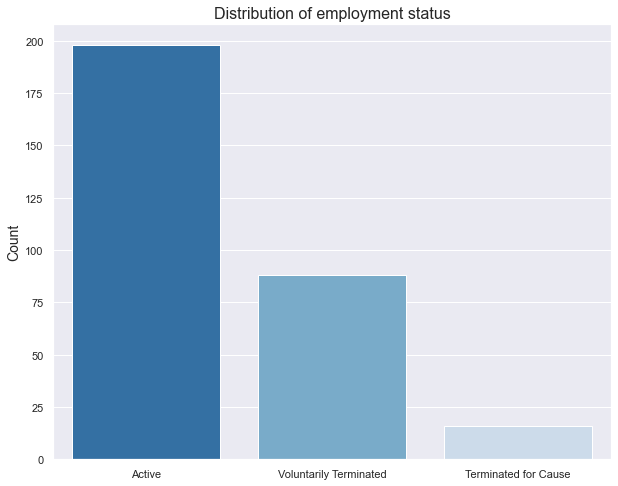

In [187]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x=df.EmploymentStatus, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of employment status', fontsize=16)
plt.xlabel("");
plt.ylabel("Count", fontsize=14);

**Conclusion** Most employees are still active (199). When we look at employees who left the company (in total 104) most of them left voluntarily (88) and some terminated for cause (16).

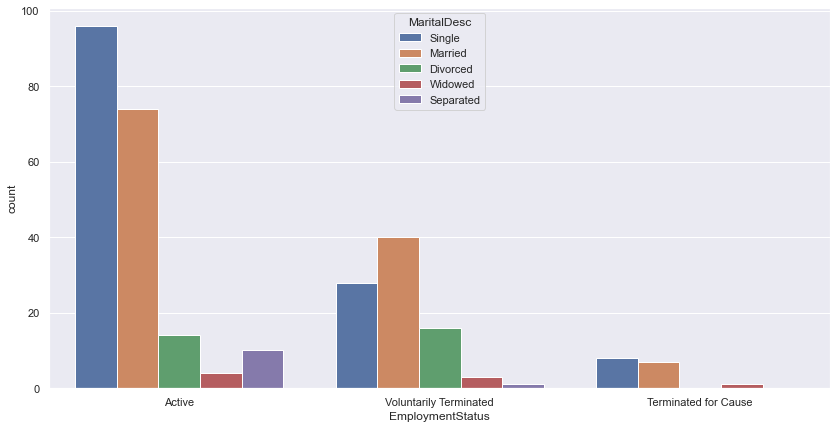

In [87]:
# check employment status and marital status
plt.figure(figsize=(14,7))
ax=sns.countplot(x=df['EmploymentStatus'],hue=df['MaritalDesc'])

## Termd

In [88]:
df.Termd.value_counts()

0    198
1    104
Name: Termd, dtype: int64

**Conclusion** Nearly the same as Employment Status.

## Absences

In [89]:
df.Absences.value_counts()

16    22
2     21
4     21
7     20
15    20
14    16
13    16
3     16
19    16
17    15
11    15
6     15
20    14
1     14
9     13
5     12
8     11
10     9
12     8
18     8
Name: Absences, dtype: int64

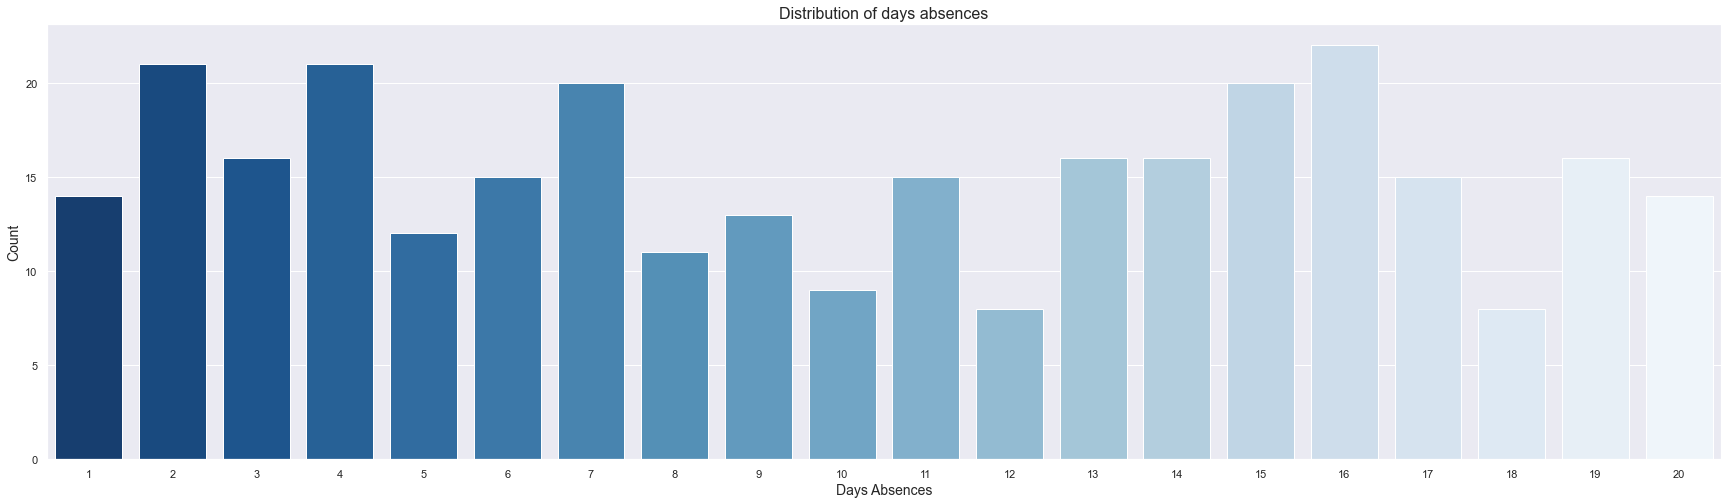

In [90]:
sns.set(rc={'figure.figsize':(30,8)})
sns.countplot(x=df.Absences, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of days absences', fontsize=16)
plt.xlabel("Days Absences", fontsize=14);
plt.ylabel("Count", fontsize=14);

**Conclusion** I assume that the absence is counted in days. So most often employees are sick for 16 days followed by 2 days.

In [221]:
#check managers with high values for absent empoloyees
HighestAbsences = df.loc[df['Absences'] == 20]
HighestAbsences['ManagerName'].value_counts()

John Smith        2
David Stanley     2
Kissy Sullivan    2
Kelley Spirea     2
Janet King        1
Brannon Miller    1
Michael Albert    1
Peter Monroe      1
Amy Dunn          1
Lynn Daneault     1
Name: ManagerName, dtype: int64

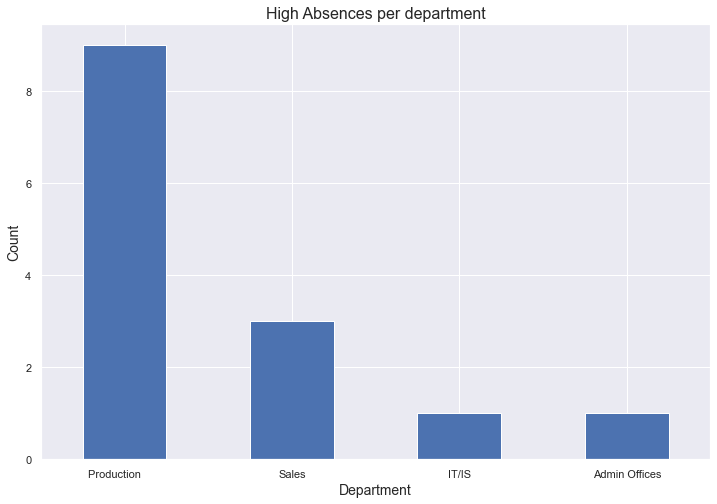

In [226]:
#check departments with high values for absent empoloyees
sns.set(rc={'figure.figsize':(12,8)})
HighestAbsences['Department'].value_counts().plot(kind="bar")
plt.xticks(rotation=0);
plt.title('High Absences per department', fontsize=16)
plt.xlabel("Department", fontsize=14);
plt.ylabel("Count", fontsize=14);

In [ ]:
# Gender diversity across departmets
plt.figure(figsize=(10,7))
ax=sns.countplot(x=df['Department'],hue=df['Sex'], palette="Blues_r")

## Days Late Last 30

In [91]:
df.DaysLateLast30.value_counts()

0    269
4      8
6      6
5      6
3      6
2      6
1      1
Name: DaysLateLast30, dtype: int64

**Conclusion** Good to see that most employees were in time (270) within the last 30 days. The top 3 "days late" are: 
* 4 days (8 employees)
* 6 days (6 employees)
* 5 days (6 employees) 
    

# Satisfaction & Job Involvement information
'PerfScoreID', 'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction', 'LastPerformanceReview_Date',

## PerfScoreID

In [92]:
df.PerfScoreID.value_counts()

3    235
4     36
2     18
1     13
Name: PerfScoreID, dtype: int64

**Conclusion** At this stage there is no value in this column, cause it's a total secret what ID is for what. We can drop it later on.

## PerformanceScore

In [93]:
df.PerformanceScore.value_counts()

Fully Meets          235
Exceeds               36
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64

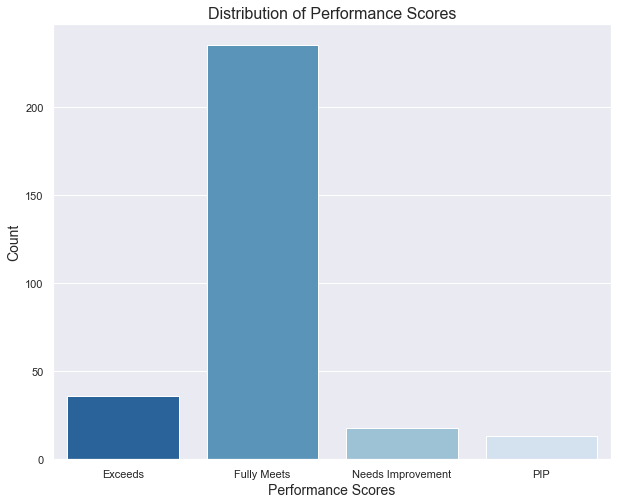

In [229]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x=df.PerformanceScore, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of Performance Scores', fontsize=16)
plt.xlabel("Performance Scores", fontsize=14);
plt.ylabel("Count", fontsize=14);

**Conclusion** Most employees fully meet the expectations. Followed by employees who exceeds the expectations (36). Only some employees need improvement (18) or need a performance imrpovement plan (PIP) (13).

In [231]:
df.groupby(['Sex', 'PerformanceScore']).size().unstack()

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
Sex,,,,
Female,19,137,9,5
Male,17,98,9,8


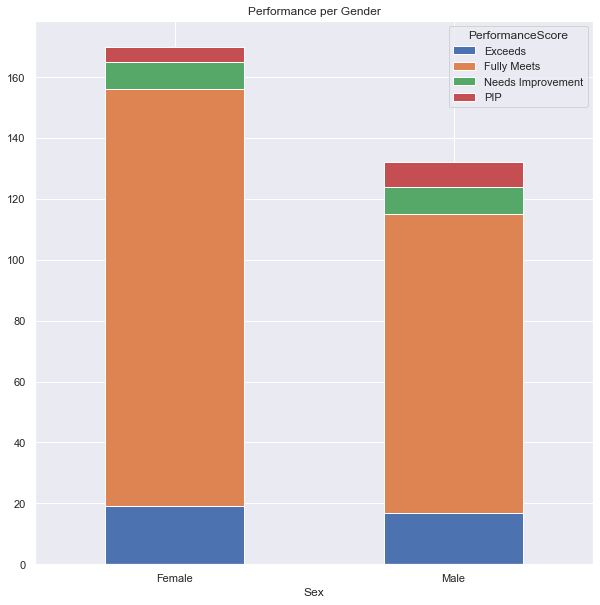

In [230]:
#is there a difference for Gender and Perfornmance Score 
df.groupby(['Sex', 'PerformanceScore']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,10))
plt.xticks(rotation=0)
plt.title("Performance per Gender");

## Engagement Survey

In [96]:
df.EngagementSurvey.value_counts()

5.00    54
4.50    18
4.30    17
4.20    16
4.10    16
        ..
4.43     1
2.81     1
3.27     1
4.63     1
1.81     1
Name: EngagementSurvey, Length: 118, dtype: int64

In [97]:
df.EngagementSurvey.nlargest(2)

4    5.0
5    5.0
Name: EngagementSurvey, dtype: float64

In [98]:
df.EngagementSurvey.nsmallest(2)

69    1.12
91    1.20
Name: EngagementSurvey, dtype: float64

**Conclusion** It seems that the column Engagement Survey is a ranking system. The highest value is 5 and the lowest is 1.2

##  EmpSatisfaction

In [99]:
df.EmpSatisfaction.value_counts()

3    104
5     95
4     92
2      9
1      2
Name: EmpSatisfaction, dtype: int64

In [100]:
print(str(df['EmpSatisfaction'].median()) + " is the overall average satisfaction")

4.0 is the overall average satisfaction


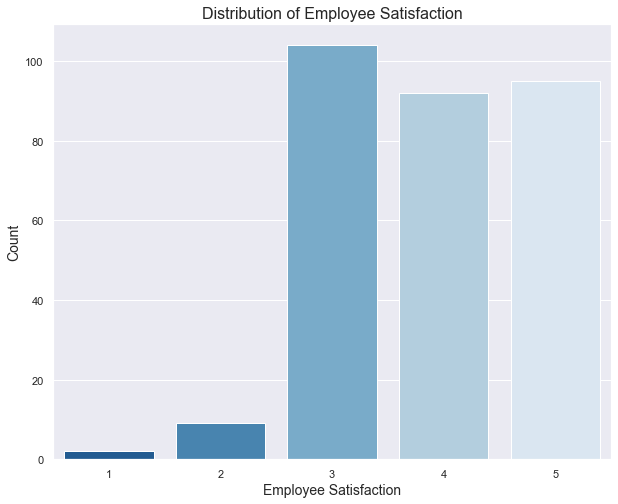

In [228]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x=df.EmpSatisfaction, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of Employee Satisfaction', fontsize=16)
plt.xlabel("Employee Satisfaction", fontsize=14);
plt.ylabel("Count", fontsize=14);

## LastPerformanceReview_Date

In [101]:
df.LastPerformanceReview_Date.value_counts()

1/14/2019    17
2/18/2019    12
2/25/2019     9
1/21/2019     9
1/28/2019     9
             ..
4/6/2017      1
4/29/2016     1
6/10/2016     1
2/20/2012     1
8/16/2015     1
Name: LastPerformanceReview_Date, Length: 137, dtype: int64

#### Prepare for splitting

In [102]:
# change Date-times airing first broadcast
df['LastPerformanceReview_Date'] = pd.to_datetime(df['LastPerformanceReview_Date'])

In [103]:
# split date to year and month and delete deadline later 
df["year_LastPerformanceReview_Date"] = df['LastPerformanceReview_Date'].dt.year 
df["month_LastPerformanceReview_Date"] = df['LastPerformanceReview_Date'].dt.month 
df["day_LastPerformanceReview_Date"] = df['LastPerformanceReview_Date'].dt.day

#### Explore new date times feature "year DOB"

In [104]:
print('No. of Last Performance Reviews per year') 
print(df.year_LastPerformanceReview_Date.groupby(df.year_LastPerformanceReview_Date).agg('count'))

No. of Last Performance Reviews per year
year_LastPerformanceReview_Date
2010      1
2011      4
2012     11
2013     17
2014     10
2015     23
2016     18
2017     10
2018      9
2019    199
Name: year_LastPerformanceReview_Date, dtype: int64


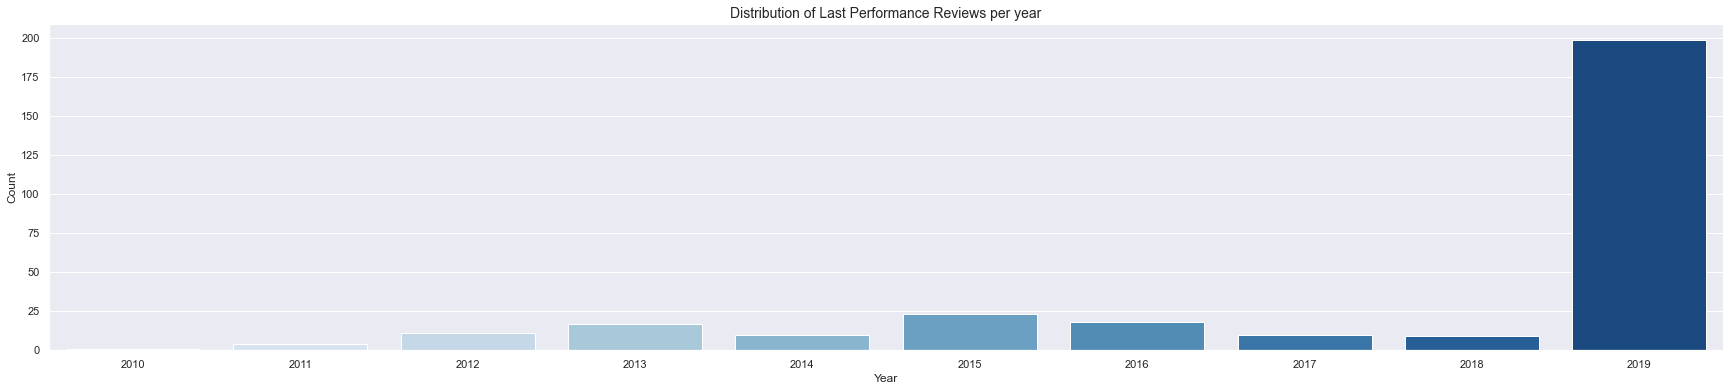

In [105]:
sns.set(rc={'figure.figsize':(30,6)})
sns.countplot(x=df.year_LastPerformanceReview_Date, palette='Blues')
plt.xticks(rotation=0)
plt.title('Distribution of Last Performance Reviews per year', fontsize=14)
plt.xlabel("Year");
plt.ylabel("Count");

#### Explore new date times feature "month DateofHire"

In [106]:
print('No. of Last Performance Reviews per month') 
print(df.month_LastPerformanceReview_Date.groupby(df.month_LastPerformanceReview_Date).agg('count').sort_values(ascending=False))

No. of Last Performance Reviews per month
month_LastPerformanceReview_Date
1     137
2     107
4      18
3      17
5       9
7       5
8       3
6       3
9       2
10      1
Name: month_LastPerformanceReview_Date, dtype: int64


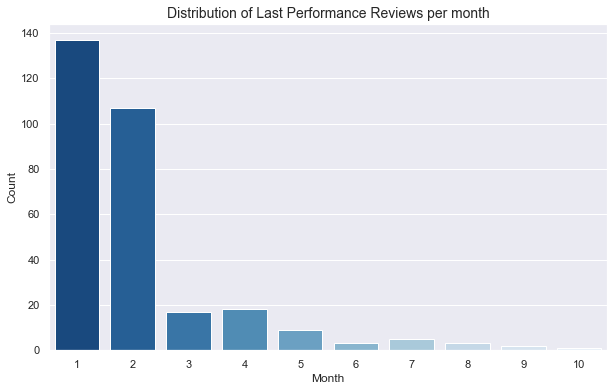

In [107]:
sns.set(rc={'figure.figsize':(10,6)})
sns.countplot(x=df.month_LastPerformanceReview_Date, palette='Blues_r')
plt.xticks(rotation=0)
plt.title('Distribution of Last Performance Reviews per month', fontsize=14)
plt.xlabel("Month");
plt.ylabel("Count");

#### Explore new date times feature "day DateofHire"

In [108]:
print('No. of Last Performance Reviews per day') 
print(df.day_LastPerformanceReview_Date.groupby(df.day_LastPerformanceReview_Date).agg('count').sort_values(ascending=False))

No. of Last Performance Reviews per day
day_LastPerformanceReview_Date
14    24
2     22
15    19
18    17
4     16
25    15
21    13
7     12
1     12
22    11
10    11
6     11
30    11
28    11
5     10
11     8
20     7
17     7
27     7
12     7
3      6
31     6
19     6
29     6
8      5
13     5
24     5
16     5
23     3
9      2
26     2
Name: day_LastPerformanceReview_Date, dtype: int64


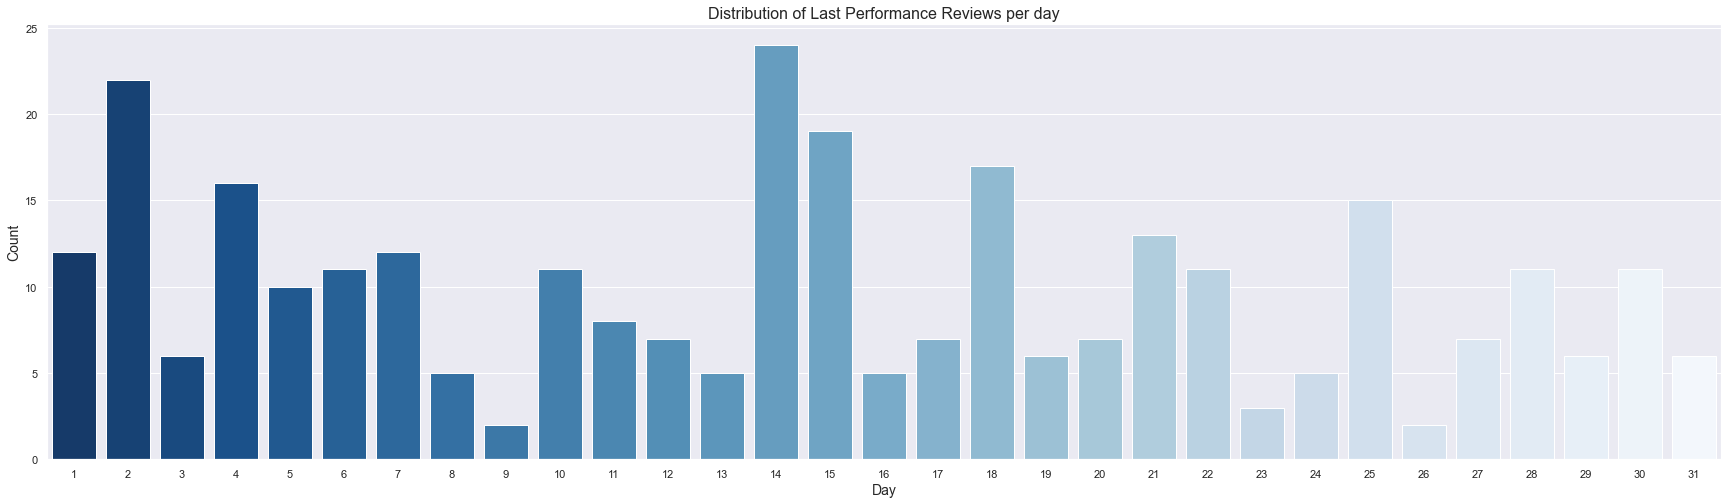

In [109]:
sns.set(rc={'figure.figsize':(30,8)})
sns.countplot(x=df.day_LastPerformanceReview_Date, palette='Blues_r')
plt.xticks(rotation=0) 
plt.title('Distribution of Last Performance Reviews per day', fontsize=16)
plt.xlabel("Day", fontsize=14);
plt.ylabel("Count", fontsize=14);

# Salary and money related information
'Salary',

## Salary

In [110]:
df.Salary.nunique()

299

In [111]:
print("The highest salary is " + str(df.Salary.max()))
print("The smallest salary is " + str(df.Salary.min()))

The highest salary is 220450
The smallest salary is 45046


##### Create a new feature "salary bins"
For a better understanding I create bins. 

In [112]:
df['Salary_bin'] = pd.cut(df["Salary"],
                               bins=[-1, 50000, 100000, 150000, 200000, 250000, np.inf],
                               labels=[0,50000, 100000, 150000, 200000, 250000])

In [113]:
df['Salary_bin'].value_counts()

50000     248
0          30
100000     18
150000      5
200000      1
250000      0
Name: Salary_bin, dtype: int64

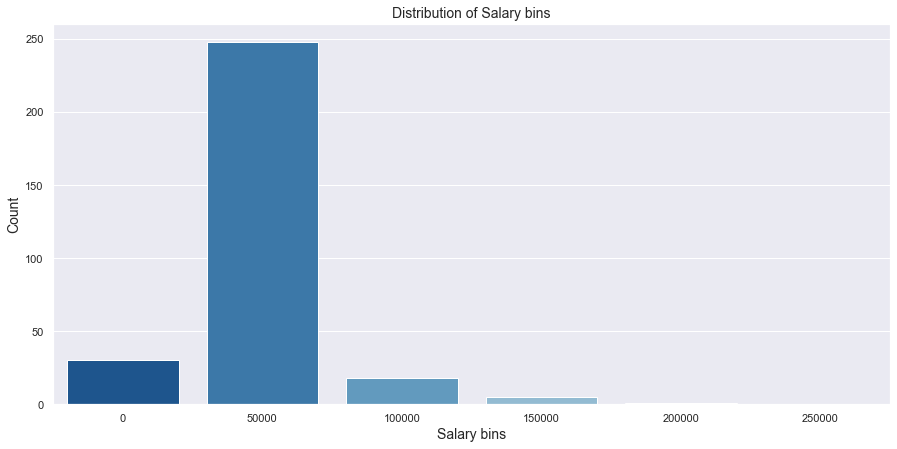

In [233]:
#plotting bins
sns.set(rc={'figure.figsize':(15,7)})
sns.countplot(x="Salary_bin", data=df, palette="Blues_r")
plt.title('Distribution of Salary bins', fontsize=14);
plt.xlabel("Salary bins", fontsize=14)
plt.ylabel("Count", fontsize=14);
plt.xticks(rotation=0);

**Conclusion** As we can see, most employees are in between 50.000 up to 100.000. Followed by employees who are earning less than 50.000.

In [115]:
# check if there is any relation between pay rate and age - need to make the feature Age
#df.plot(x='Age',y='Pay Rate',kind='scatter')

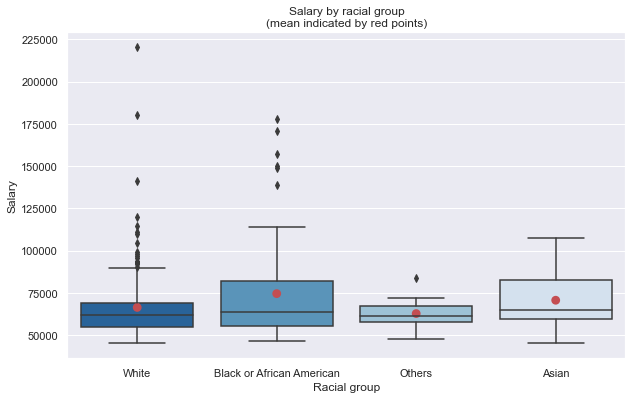

In [237]:
#check the salary per Race
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=df, x='RaceDesc', y='Salary', palette='Blues_r')
ax.set_xticklabels(df.RaceDesc.unique(), rotation=90)
sns.pointplot(data=df, x='RaceDesc', y='Salary', join=False, ci=None, ax=ax, color='r');
ax.set_ylabel('Salary'); ax.set_title('Salary by racial group\n(mean indicated by red points)');
plt.xticks(rotation=0);

**Conclusion** There are a few differences in median and mean payment across races. This does not, however, seem particularly problematic. Let's look at each department.

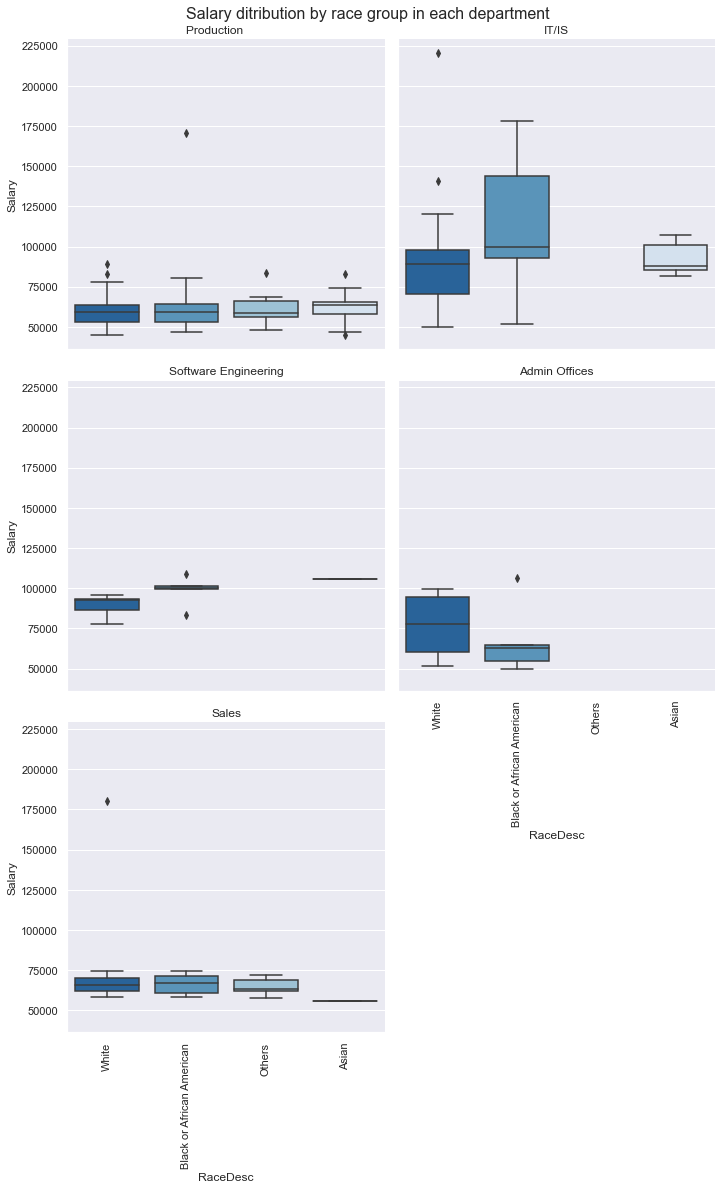

In [117]:
g = sns.catplot(data=df, x='RaceDesc', col_wrap=2,
                y='Salary', col='Department', kind='box', palette='Blues_r')
g.set_xticklabels(df.RaceDesc.unique(), rotation=90)
g.set_ylabels('Salary')
g.fig.suptitle(
    'Salary ditribution by race group in each department', fontsize=16)
g.set_titles('{col_name}')
plt.subplots_adjust(top=0.95)

**Conclusion** 
* We can see that there are some outliers for the “white” and “black / african american” race
* The mean for “black / african american” is higher than the median
* If we check if there are differences for the salary per race per department I got the following results
* In Production we do have one “black / african american” person with a very high salary
* In sales the salary for each race is nearly the same only the Asian people do earn less
* In the IT/IS the salary range for black / african american people differs a lot

In [119]:
# Check Gender Pay 
GenderPay = df.groupby('Sex')[['Salary']]
display(GenderPay.agg(['mean', 'median']))

Salary         
                mean   median
Sex                          
Female  66997.182353  62063.0
Male    70879.174242  63401.5

**Conclusion** Are female employees getting equal pay? That's a no. Women's income is lower in general.

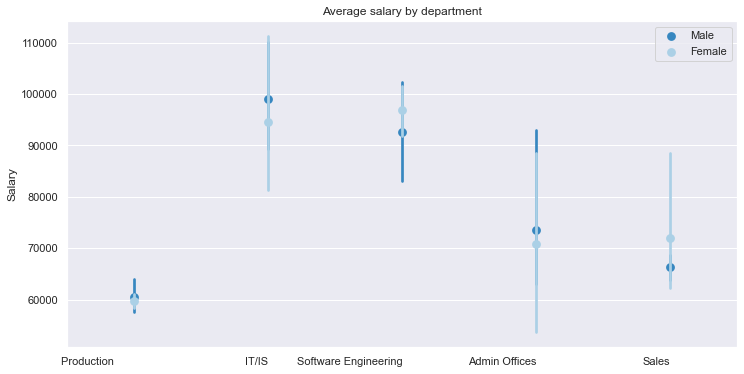

In [244]:
#closer look for salary per gender in each department 
plt.figure(figsize=(12, 6))
ax = sns.pointplot(data=df, x='Department', y='Salary',
                   hue='Sex', palette='Blues_r' , join=False)
ax.set_xticklabels(df.Department.unique(), rotation=45,
                   horizontalalignment='right');
ax.legend()
ax.set_title("Average salary by department"), ax.set_ylabel(
    'Salary');
plt.xticks(rotation=0);
plt.xlabel("");

# Others
'FromDiversityJobFairID', 'RecruitmentSource', 'SpecialProjectsCount',

## FromDiversityJobFairID

In [121]:
df.FromDiversityJobFairID.value_counts()

0    273
1     29
Name: FromDiversityJobFairID, dtype: int64

**Conclusion** I think this column tells is if an employee is hire from a diversity job fair. And 0 stands for no and 1 stands for yes. But that is just an assumption.

## RecruitmentSource

In [122]:
#Best resourse for gathering Emplyees
df.RecruitmentSource.value_counts()

Indeed                     85
LinkedIn                   72
Google Search              46
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

In [123]:
# replace Online Web Application with Other 
df['RecruitmentSource'].replace('On-line Web application', 'Other', inplace=True)

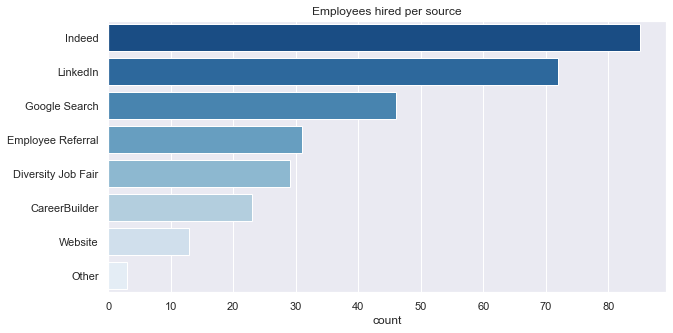

In [249]:
plt.figure(figsize=(10,5))
sns.countplot(y='RecruitmentSource',palette="Blues_r", data=df, order = df['RecruitmentSource'].value_counts().index);
plt.ylabel(""); 
plt.title("Employees hired per source");

**Conclusion** Most employees are hire from Indeed followed nby Linkedin. The worst recruitment sources are "online web application", "other" and "wbsite". It's also interesting that the Diversity job fair is mentioned with 29. So as I assumed the column FromDiversityJobFairID could be deleted.

## SpecialProjectsCount

In [125]:
df.SpecialProjectsCount.value_counts()

0    232
6     21
5     21
7     12
4      9
3      3
8      2
2      1
1      1
Name: SpecialProjectsCount, dtype: int64

# Summary

In this EDA I tried to answer the following questions

1. What are our best recruiting sources in total and if we want to ensure a diverse organization?
2. Are there areas of the company where pay is not equitable?
3. What is the overall diversity profile of the organization?

and further more. 

**All insights could be seen in the presentation document (PDF).** 

# Save Dataframe for model

In [126]:
df.to_csv(r'/Users/raphaelaboll/nf-sep-20/Projects/HR_Dataset/HRDFforModel.csv', index=False)